In [1]:
import pandas as pd

In [2]:
path = r"D:\lhs-projects\02-情绪指数\deep-ficc\deep-ficc\DataServiceApi\data\ag2112_20210401_20210430.csv"

In [3]:
raw = pd.read_csv(path)

In [4]:
raw.head()

tx_time  best_bid_price_1  best_bid_size_1  \
0  2021-04-29 09:01:33.764            5551.0                2   
1  2021-04-29 09:01:34.569            5551.0                3   
2  2021-04-29 09:01:35.352            5551.0                2   
3  2021-04-29 09:01:35.603            5551.0                1   
4  2021-04-29 09:01:36.099            5550.0                1   

   best_ask_price_1  best_ask_size_1  best_bid_price_2  best_bid_size_2  \
0            5552.0                3            5550.0                1   
1            5553.0                2            5550.0                1   
2            5553.0                1            5550.0                1   
3            5554.0                5            5550.0                1   
4            5551.0                1            5548.0                7   

   best_ask_price_2  best_ask_size_2  best_bid_price_3  ...  best_ask_price_4  \
0            5553.0                2            5549.0  ...            5555.0   
1            5554.0                5            5548.0  ...            5556.0   
2            5554.0                5            5548.0  ...            5556.0   
3            5555.0               10            5548.0  ...            5557.0   
4            5552.0                4            5547.0  ...            5554.0   

   best_ask_size_4  best_bid_price_5  best_bid_size_5  best_ask_price_5  \
0               10            5547.0                1            5556.0   
1                5            5546.0                8            5557.0   
2                5            5546.0                8            5557.0   
3                2            5546.0                8            5558.0   
4               25            5545.0                6            5555.0   

   best_ask_size_5  last_price  matchtot_qty  clear_price  open_interest  
0                6      5551.0         12013          0.0          75045  
1                2      5552.0         12016          0.0          75045  
2                2      5552.0         12016          0.0          75045  
3                5      5551.0         12018          0.0          75046  
4               10      5551.0         12019          0.0          75046  

[5 rows x 25 columns]

In [5]:
raw.shape

(14828, 25)

In [6]:
# 时间预处理

In [1]:
from importlib import reload
import feat_eng
reload(feat_eng)
import feat_eng.preprocess as prep

In [1]:
# 指定列转换成时间格式
trans = prep.ConvertToTime('tx_time')
trans.fit(raw)
df = trans.transform(raw)
df.head()

NameError: name 'prep' is not defined

In [9]:
df.tx_time.dtype

dtype('<M8[ns]')

In [10]:
trans.fit_transform(raw).head()

tx_time  best_bid_price_1  best_bid_size_1  \
0 2020-12-07 09:14:54.713            5015.0                2   
1 2020-12-07 09:14:57.507            5014.0               28   
2 2020-12-07 09:14:57.756            5015.0                2   
3 2020-12-07 09:14:58.258            5015.0                4   
4 2020-12-07 09:14:58.762            5015.0                8   

   best_ask_price_1  best_ask_size_1  best_bid_price_2  best_bid_size_2  \
0            5020.0                4            5014.0               24   
1            5015.0                2            5013.0                6   
2            5020.0                2            5014.0               28   
3            5020.0                4            5014.0               28   
4            5020.0                2            5014.0               24   

   best_ask_price_2  best_ask_size_2  best_bid_price_3  ...  best_ask_price_4  \
0            5024.0                2            5013.0  ...            5028.0   
1            5020.0                4            5012.0  ...            5025.0   
2            5024.0                2            5013.0  ...            5028.0   
3            5024.0                2            5013.0  ...            5028.0   
4            5024.0                2            5013.0  ...            5028.0   

   best_ask_size_4  best_bid_price_5  best_bid_size_5  best_ask_price_5  \
0                2            5010.0               14            5030.0   
1                2            5003.0               16            5028.0   
2                2            5010.0               14            5030.0   
3                2            5010.0               14            5030.0   
4                2            5010.0               14            5030.0   

   best_ask_size_5  last_price  matchtot_qty  clear_price  open_interest  
0                2      5019.0         10336          0.0          67808  
1                2      5019.0         10336          0.0          67808  
2                2      5015.0         10338          0.0          67806  
3                2      5015.0         10338          0.0          67806  
4                2      5015.0         10338          0.0          67806  

[5 rows x 25 columns]

In [11]:
# 将指定列转化为时间格式，并设置为index
trans = prep.SetTimeIndex('tx_time')
df = trans.fit_transform(raw)
df.head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   

                         best_bid_size_3  ...  best_ask_price_4  \
tx_time                                   ...                     
2020-12-07 09:14:54.713                6  ...            5028.0   
2020-12-07 09:14:57.507                2  ...            5025.0   
2020-12-07 09:14:57.756                6  ...            5028.0   
2020-12-07 09:14:58.258                6  ...            5028.0   
2020-12-07 09:14:58.762                6  ...            5028.0   

                         best_ask_size_4  best_bid_price_5  best_bid_size_5  \
tx_time                                                                       
2020-12-07 09:14:54.713                2            5010.0               14   
2020-12-07 09:14:57.507                2            5003.0               16   
2020-12-07 09:14:57.756                2            5010.0               14   
2020-12-07 09:14:58.258                2            5010.0               14   
2020-12-07 09:14:58.762                2            5010.0               14   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2020-12-07 09:14:54.713            5030.0                2      5019.0   
2020-12-07 09:14:57.507            5028.0                2      5019.0   
2020-12-07 09:14:57.756            5030.0                2      5015.0   
2020-12-07 09:14:58.258            5030.0                2      5015.0   
2020-12-07 09:14:58.762            5030.0                2      5015.0   

                         matchtot_qty  clear_price  open_interest  
tx_time                                                            
2020-12-07 09:14:54.713         10336          0.0          67808  
2020-12-07 09:14:57.507         10336          0.0          67808  
2020-12-07 09:14:57.756         10338          0.0          67806  
2020-12-07 09:14:58.258         10338          0.0          67806  
2020-12-07 09:14:58.762         10338          0.0          67806  

[5 rows x 24 columns]

In [12]:
# 按时间索引排序
trans = prep.SortTimeIndex()  # 默认升序
df = trans.fit_transform(raw)  # 索引必须是时间类型

ValueError: index must be type of time

In [13]:
df = trans.fit_transform(df)
df.head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   

                         best_bid_size_3  ...  best_ask_price_4  \
tx_time                                   ...                     
2020-12-07 09:14:54.713                6  ...            5028.0   
2020-12-07 09:14:57.507                2  ...            5025.0   
2020-12-07 09:14:57.756                6  ...            5028.0   
2020-12-07 09:14:58.258                6  ...            5028.0   
2020-12-07 09:14:58.762                6  ...            5028.0   

                         best_ask_size_4  best_bid_price_5  best_bid_size_5  \
tx_time                                                                       
2020-12-07 09:14:54.713                2            5010.0               14   
2020-12-07 09:14:57.507                2            5003.0               16   
2020-12-07 09:14:57.756                2            5010.0               14   
2020-12-07 09:14:58.258                2            5010.0               14   
2020-12-07 09:14:58.762                2            5010.0               14   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2020-12-07 09:14:54.713            5030.0                2      5019.0   
2020-12-07 09:14:57.507            5028.0                2      5019.0   
2020-12-07 09:14:57.756            5030.0                2      5015.0   
2020-12-07 09:14:58.258            5030.0                2      5015.0   
2020-12-07 09:14:58.762            5030.0                2      5015.0   

                         matchtot_qty  clear_price  open_interest  
tx_time                                                            
2020-12-07 09:14:54.713         10336          0.0          67808  
2020-12-07 09:14:57.507         10336          0.0          67808  
2020-12-07 09:14:57.756         10338          0.0          67806  
2020-12-07 09:14:58.258         10338          0.0          67806  
2020-12-07 09:14:58.762         10338          0.0          67806  

[5 rows x 24 columns]

In [14]:
# 筛选时间段内的数据
trans = prep.TimeRangePicker(start='9:00:00', end='10:00:00')
trans.fit_transform(df)

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   
...                                   ...              ...               ...   
2020-12-15 09:59:38.168            4968.0                2            4971.0   
2020-12-15 09:59:42.197            4968.0               12            4971.0   
2020-12-15 09:59:42.697            4968.0               12            4977.0   
2020-12-15 09:59:43.203            4968.0                2            4977.0   
2020-12-15 09:59:57.704            4969.0               26            4977.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   
...                                  ...               ...              ...   
2020-12-15 09:59:38.168                2            4967.0               26   
2020-12-15 09:59:42.197                2            4967.0               26   
2020-12-15 09:59:42.697                2            4967.0               26   
2020-12-15 09:59:43.203                2            4967.0               26   
2020-12-15 09:59:57.704                2            4968.0                2   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   
...                                   ...              ...               ...   
2020-12-15 09:59:38.168            4977.0                2            4958.0   
2020-12-15 09:59:42.197            4977.0                2            4958.0   
2020-12-15 09:59:42.697            4978.0                4            4958.0   
2020-12-15 09:59:43.203            4978.0                4            4958.0   
2020-12-15 09:59:57.704            4978.0                4            4958.0   

                         best_bid_size_3  ...  best_ask_price_4  \
tx_time                                   ...                     
2020-12-07 09:14:54.713                6  ...            5028.0   
2020-12-07 09:14:57.507                2  ...            5025.0   
2020-12-07 09:14:57.756                6  ...            5028.0   
2020-12-07 09:14:58.258                6  ...            5028.0   
2020-12-07 09:14:58.762                6  ...            5028.0   
...                                  ...  ...               ...   
2020-12-15 09:59:38.168               14  ...            4988.0   
2020-12-15 09:59:42.197               14  ...            4988.0   
2020-12-15 09:59:42.697               14  ...            5027.0   
2020-12-15 09:59:43.203               14  ...            5027.0   
2020-12-15 09:59:57.704               14  ...            5027.0   

                         best_ask_size_4  b

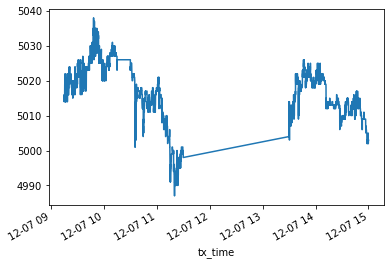

In [24]:
# 筛选白银现货交易时间内的数据
trans = prep.AgSpotTradingTimePicker()
trans.fit_transform(df).loc['2020-12-07', 'best_bid_price_1'].plot()

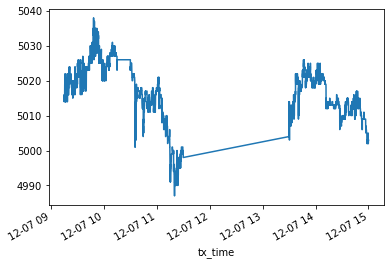

In [25]:
# 筛选白银期货交易时间内的数据
trans = prep.AgSpotTradingTimePicker()
trans.fit_transform(df).loc['2020-12-07', 'best_bid_price_1'].plot()

In [5]:
from feat_eng import preprocess as prep
# 通用处理pipeline
df = prep.common_ag_spot_preprocess(raw, 'tx_time')
df.head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2021-04-29 09:01:33.764            5551.0                2            5552.0   
2021-04-29 09:01:34.569            5551.0                3            5553.0   
2021-04-29 09:01:35.352            5551.0                2            5553.0   
2021-04-29 09:01:35.603            5551.0                1            5554.0   
2021-04-29 09:01:36.099            5550.0                1            5551.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2021-04-29 09:01:33.764                3            5550.0                1   
2021-04-29 09:01:34.569                2            5550.0                1   
2021-04-29 09:01:35.352                1            5550.0                1   
2021-04-29 09:01:35.603                5            5550.0                1   
2021-04-29 09:01:36.099                1            5548.0                7   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2021-04-29 09:01:33.764            5553.0                2            5549.0   
2021-04-29 09:01:34.569            5554.0                5            5548.0   
2021-04-29 09:01:35.352            5554.0                5            5548.0   
2021-04-29 09:01:35.603            5555.0               10            5548.0   
2021-04-29 09:01:36.099            5552.0                4            5547.0   

                         best_bid_size_3  ...  best_ask_price_4  \
tx_time                                   ...                     
2021-04-29 09:01:33.764                2  ...            5555.0   
2021-04-29 09:01:34.569                7  ...            5556.0   
2021-04-29 09:01:35.352                7  ...            5556.0   
2021-04-29 09:01:35.603                7  ...            5557.0   
2021-04-29 09:01:36.099                1  ...            5554.0   

                         best_ask_size_4  best_bid_price_5  best_bid_size_5  \
tx_time                                                                       
2021-04-29 09:01:33.764               10            5547.0                1   
2021-04-29 09:01:34.569                5            5546.0                8   
2021-04-29 09:01:35.352                5            5546.0                8   
2021-04-29 09:01:35.603                2            5546.0                8   
2021-04-29 09:01:36.099               25            5545.0                6   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2021-04-29 09:01:33.764            5556.0                6      5551.0   
2021-04-29 09:01:34.569            5557.0                2      5552.0   
2021-04-29 09:01:35.352            5557.0                2      5552.0   
2021-04-29 09:01:35.603            5558.0                5      5551.0   
2021-04-29 09:01:36.099            5555.0               10      5551.0   

                         matchtot_qty  clear_price  open_interest  
tx_time                                                            
2021-04-29 09:01:33.764         12013          0.0          75045  
2021-04-29 09:01:34.569         12016          0.0          75045  
2021-04-29 09:01:35.352         12016          0.0          75045  
2021-04-29 09:01:35.603         12018          0.0          75046  
2021-04-29 09:01:36.099         12019          0.0          75046  

[5 rows x 24 columns]

# 技术指标

In [6]:
from feat_eng import ta
from importlib import reload
reload(ta)

<module 'feat_eng.ta' from 'C:\\Users\\it06202\\Anaconda3\\lib\\site-packages\\feat_eng\\ta.py'>

In [7]:
# 计算移动平均
ma = ta.MA('last_price', n=6)
ma.fit_transform(df).head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2021-04-29 09:01:33.764            5551.0                2            5552.0   
2021-04-29 09:01:34.569            5551.0                3            5553.0   
2021-04-29 09:01:35.352            5551.0                2            5553.0   
2021-04-29 09:01:35.603            5551.0                1            5554.0   
2021-04-29 09:01:36.099            5550.0                1            5551.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2021-04-29 09:01:33.764                3            5550.0                1   
2021-04-29 09:01:34.569                2            5550.0                1   
2021-04-29 09:01:35.352                1            5550.0                1   
2021-04-29 09:01:35.603                5            5550.0                1   
2021-04-29 09:01:36.099                1            5548.0                7   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2021-04-29 09:01:33.764            5553.0                2            5549.0   
2021-04-29 09:01:34.569            5554.0                5            5548.0   
2021-04-29 09:01:35.352            5554.0                5            5548.0   
2021-04-29 09:01:35.603            5555.0               10            5548.0   
2021-04-29 09:01:36.099            5552.0                4            5547.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2021-04-29 09:01:33.764                2  ...               10   
2021-04-29 09:01:34.569                7  ...                5   
2021-04-29 09:01:35.352                7  ...                5   
2021-04-29 09:01:35.603                7  ...                2   
2021-04-29 09:01:36.099                1  ...               25   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2021-04-29 09:01:33.764            5547.0                1            5556.0   
2021-04-29 09:01:34.569            5546.0                8            5557.0   
2021-04-29 09:01:35.352            5546.0                8            5557.0   
2021-04-29 09:01:35.603            5546.0                8            5558.0   
2021-04-29 09:01:36.099            5545.0                6            5555.0   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2021-04-29 09:01:33.764                6      5551.0         12013   
2021-04-29 09:01:34.569                2      5552.0         12016   
2021-04-29 09:01:35.352                2      5552.0         12016   
2021-04-29 09:01:35.603                5      5551.0         12018   
2021-04-29 09:01:36.099               10      5551.0         12019   

                         clear_price  open_interest  ma_last_price_6  
tx_time                                                               
2021-04-29 09:01:33.764          0.0          75045              NaN  
2021-04-29 09:01:34.569          0.0          75045              NaN  
2021-04-29 09:01:35.352          0.0          75045              NaN  
2021-04-29 09:01:35.603          0.0          75046              NaN  
2021-04-29 09:01:36.099          0.0          75046              NaN  

[5 rows x 25 columns]

In [48]:
# 计算指数平滑移动平均
ema = ta.EMA('last_price', n=5)
ema.fit_transform(df).head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-07 09:14:54.713                6  ...                2   
2020-12-07 09:14:57.507                2  ...                2   
2020-12-07 09:14:57.756                6  ...                2   
2020-12-07 09:14:58.258                6  ...                2   
2020-12-07 09:14:58.762                6  ...                2   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-07 09:14:54.713            5010.0               14            5030.0   
2020-12-07 09:14:57.507            5003.0               16            5028.0   
2020-12-07 09:14:57.756            5010.0               14            5030.0   
2020-12-07 09:14:58.258            5010.0               14            5030.0   
2020-12-07 09:14:58.762            5010.0               14            5030.0   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-07 09:14:54.713                2      5019.0         10336   
2020-12-07 09:14:57.507                2      5019.0         10336   
2020-12-07 09:14:57.756                2      5015.0         10338   
2020-12-07 09:14:58.258                2      5015.0         10338   
2020-12-07 09:14:58.762                2      5015.0         10338   

                         clear_price  open_interest  ema_last_price_5  
tx_time                                                                
2020-12-07 09:14:54.713          0.0          67808       5019.000000  
2020-12-07 09:14:57.507          0.0          67808       5019.000000  
2020-12-07 09:14:57.756          0.0          67806       5017.666667  
2020-12-07 09:14:58.258          0.0          67806       5016.777778  
2020-12-07 09:14:58.762          0.0          67806       5016.185185  

[5 rows x 25 columns]

In [47]:
# 计算MACD
trans = ta.MACD('last_price')
trans.fit_transform(df).head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   

                         best_bid_size_3  ...  best_bid_size_5  \
tx_time                                   ...                    
2020-12-07 09:14:54.713                6  ...               14   
2020-12-07 09:14:57.507                2  ...               16   
2020-12-07 09:14:57.756                6  ...               14   
2020-12-07 09:14:58.258                6  ...               14   
2020-12-07 09:14:58.762                6  ...               14   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2020-12-07 09:14:54.713            5030.0                2      5019.0   
2020-12-07 09:14:57.507            5028.0                2      5019.0   
2020-12-07 09:14:57.756            5030.0                2      5015.0   
2020-12-07 09:14:58.258            5030.0                2      5015.0   
2020-12-07 09:14:58.762            5030.0                2      5015.0   

                         matchtot_qty  clear_price  open_interest  \
tx_time                                                             
2020-12-07 09:14:54.713         10336          0.0          67808   
2020-12-07 09:14:57.507         10336          0.0          67808   
2020-12-07 09:14:57.756         10338          0.0          67806   
2020-12-07 09:14:58.258         10338          0.0          67806   
2020-12-07 09:14:58.762         10338          0.0          67806   

                         dif_last_price_9_12_26  dea_last_price_9_12_26  \
tx_time                                                                   
2020-12-07 09:14:54.713                0.000000                0.000000   
2020-12-07 09:14:57.507                0.000000                0.000000   
2020-12-07 09:14:57.756               -0.319088               -0.063818   
2020-12-07 09:14:58.258               -0.565450               -0.164144   
2020-12-07 09:14:58.762               -0.752024               -0.281720   

                         macd_last_price_9_12_26  
tx_time                                           
2020-12-07 09:14:54.713                 0.000000  
2020-12-07 09:14:57.507                 0.000000  
2020-12-07 09:14:57.756                -0.510541  
2020-12-07 09:14:58.258                -0.802612  
2020-12-07 09:14:58.762                -0.940609  


In [46]:
# 计算布林通道
trans = ta.Bollin('last_price')
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_bid_size_5  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...               40   
2020-12-15 14:56:55.461               10  ...               40   
2020-12-15 14:57:01.370               10  ...               40   
2020-12-15 14:57:19.938               10  ...               60   
2020-12-15 14:59:36.310               40  ...               10   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2020-12-15 14:56:52.952               NaN                0      5026.0   
2020-12-15 14:56:55.461               NaN                0      5026.0   
2020-12-15 14:57:01.370               NaN                0      5026.0   
2020-12-15 14:57:19.938               NaN                0      5026.0   
2020-12-15 14:59:36.310               NaN                0      5026.0   

                         matchtot_qty  clear_price  open_interest  \
tx_time                                                             
2020-12-15 14:56:52.952          2716          0.0          50594   
2020-12-15 14:56:55.461          2716          0.0          50594   
2020-12-15 14:57:01.370          2716          0.0          50594   
2020-12-15 14:57:19.938          2716          0.0          50594   
2020-12-15 14:59:36.310          2716          0.0          50594   

                         upper_last_price_9_2  middle_last_price_9_2  \
tx_time                                                                
2020-12-15 14:56:52.952           5026.333333            5025.333333   
2020-12-15 14:56:55.461           5026.498537            5025.444444   
2020-12-15 14:57:01.370           5026.609648            5025.555556   
2020-12-15 14:57:19.938           5026.666667            5025.666667   
2020-12-15 14:59:36.310           5026.659695            5025.777778   

                         lower_last_price_9_2  
tx_time                                        
2020-12-15 14:56:52.952           5024.333333  
2020-12-15 14:56:55.461           5024.390352  
2020-12-15 14:57:01.370           5024.501463  
2020-12-15 14:57:19.938           5024.666667  
2020-12-15 14:59:36.310           5024.895861  

[5 rows x 27 columns]

In [16]:
%%time
# 计算rsi
reload(ta)
trans = ta.RSI('last_price')
trans.fit_transform(df)

Wall time: 2.73 s


best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   
...                                   ...              ...               ...   
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   
...                                  ...               ...              ...   
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   
...                                   ...              ...               ...   
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-07 09:14:54.713                6  ...                2   
2020-12-07 09:14:57.507                2  ...                2   
2020-12-07 09:14:57.756                6  ...                2   
2020-12-07 09:14:58.258                6  ...                2   
2020-12-07 09:14:58.762                6  ...                2   
...                                  ...  ...              ...   
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size

In [44]:
# 简易波动
reload(ta)
trans = ta.OBV('qty')
trans.fit_transform(df.assign(qty=df['matchtot_qty'].diff()))

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   
...                                   ...              ...               ...   
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   
...                                  ...               ...              ...   
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   
...                                   ...              ...               ...   
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_bid_price_5  \
tx_time                                   ...                     
2020-12-07 09:14:54.713                6  ...            5010.0   
2020-12-07 09:14:57.507                2  ...            5003.0   
2020-12-07 09:14:57.756                6  ...            5010.0   
2020-12-07 09:14:58.258                6  ...            5010.0   
2020-12-07 09:14:58.762                6  ...            5010.0   
...                                  ...  ...               ...   
2020-12-15 14:56:52.952               10  ...            4970.0   
2020-12-15 14:56:55.461               10  ...            4970.0   
2020-12-15 14:57:01.370               10  ...            4970.0   
2020-12-15 14:57:19.938               10  ...            4950.0   
2020-12-15 14:59:36.310               40  ...            4905.0   

                         best_bid_size_5  b

In [43]:
# 计算bias
reload(ta)
trans = ta.BIAS('last_price')
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  bias_last_price_9  
tx_time                                                                 
2020-12-15 14:56:52.952          0.0          50594           0.013266  
2020-12-15 14:56:55.461          0.0          50594           0.011055  
2020-12-15 14:57:01.370          0.0          50594           0.008844  
2020-12-15 14:57:19.938          0.0          50594           0.006633  
2020-12-15 14:59:36.310          0.0          50594           0.004422  

[5 rows x 25 columns]

In [15]:
%%time
# 计算kdj
from importlib import reload
import feat_eng
from feat_eng import resample as rs
from feat_eng import ta
from sklearn.pipeline import make_pipeline
reload(feat_eng)
reload(ta)
trans = make_pipeline(rs.OHLCSampler('1T'), ta.KDJ())
trans.fit_transform(df['last_price'])

Wall time: 33.3 ms


open    high     low   close        k_9        d_9  \
tx_time                                                                     
2020-12-07 09:14:00  5019.0  5019.0  5015.0  5015.0  50.000000  50.000000   
2020-12-07 09:15:00  5015.0  5024.0  5014.0  5020.0  20.000000   6.666667   
2020-12-07 09:16:00  5020.0  5020.0  5016.0  5016.0   6.666667   2.222222   
2020-12-07 09:17:00  5016.0  5022.0  5016.0  5019.0  16.666667   5.555556   
2020-12-07 09:18:00  5019.0  5022.0  5016.0  5021.0  23.333333   7.777778   
...                     ...     ...     ...     ...        ...        ...   
2020-12-15 14:55:00     NaN     NaN     NaN     NaN        NaN        NaN   
2020-12-15 14:56:00  5026.0  5026.0  5026.0  5026.0  16.064257   5.354752   
2020-12-15 14:57:00  5026.0  5026.0  5026.0  5026.0  16.064257   5.354752   
2020-12-15 14:58:00     NaN     NaN     NaN     NaN        NaN        NaN   
2020-12-15 14:59:00  5026.0  5026.0  5026.0  5026.0  16.064257   5.354752   

                           j_9  
tx_time                         
2020-12-07 09:14:00  50.000000  
2020-12-07 09:15:00  46.666667  
2020-12-07 09:16:00  15.555556  
2020-12-07 09:17:00  38.888889  
2020-12-07 09:18:00  54.444444  
...                        ...  
2020-12-15 14:55:00        NaN  
2020-12-15 14:56:00  37.483266  
2020-12-15 14:57:00  37.483266  
2020-12-15 14:58:00        NaN  
2020-12-15 14:59:00  37.483266  

[11866 rows x 7 columns]

In [41]:
# 计算cci_a
from feat_eng import resample as rs
from sklearn.pipeline import make_pipeline
reload(ta)
trans = make_pipeline(rs.OHLCSampler('1T'), ta.CCI_A())
trans.fit_transform(df['last_price']).query('cci_9 > 0')

open    high     low   close       cci_9
tx_time                                                        
2020-12-07 09:30:00  5020.0  5027.0  5020.0  5026.0  126.114650
2020-12-07 09:31:00  5026.0  5026.0  5026.0  5026.0  137.234043
2020-12-07 09:32:00  5026.0  5027.0  5022.0  5024.0   69.565217
2020-12-07 09:33:00  5024.0  5027.0  5022.0  5023.0   47.191011
2020-12-07 09:35:00  5020.0  5027.0  5020.0  5027.0   52.941176
...                     ...     ...     ...     ...         ...
2020-12-15 10:47:00  5000.0  5000.0  5000.0  5000.0   24.742268
2020-12-15 10:51:00  5000.0  5000.0  5000.0  5000.0   29.556650
2020-12-15 13:50:00  5023.0  5028.0  5023.0  5028.0   65.217391
2020-12-15 13:51:00  5028.0  5030.0  5027.0  5030.0  108.088235
2020-12-15 13:52:00  5030.0  5030.0  5030.0  5030.0  114.388489

[188 rows x 5 columns]

In [40]:
# 计算cci_b
from feat_eng import resample as rs
from sklearn.pipeline import make_pipeline
reload(ta)
trans = make_pipeline(rs.OHLCSampler('1T'), ta.CCI_B())
trans.fit_transform(df['last_price']).query('cci_9 > 0')

open    high     low   close       cci_9
tx_time                                                        
2020-12-07 09:30:00  5020.0  5027.0  5020.0  5026.0  120.000000
2020-12-07 09:31:00  5026.0  5026.0  5026.0  5026.0  133.109244
2020-12-07 09:32:00  5026.0  5027.0  5022.0  5024.0   68.807339
2020-12-07 09:33:00  5024.0  5027.0  5022.0  5023.0   48.936170
2020-12-07 09:35:00  5020.0  5027.0  5020.0  5027.0   49.133858
...                     ...     ...     ...     ...         ...
2020-12-15 10:47:00  5000.0  5000.0  5000.0  5000.0   31.118314
2020-12-15 10:51:00  5000.0  5000.0  5000.0  5000.0   28.346457
2020-12-15 13:50:00  5023.0  5028.0  5023.0  5028.0   65.569918
2020-12-15 13:51:00  5028.0  5030.0  5027.0  5030.0  108.639053
2020-12-15 13:52:00  5030.0  5030.0  5030.0  5030.0  113.924051

[195 rows x 5 columns]

In [39]:
# 计算EMV
from feat_eng import resample as rs
from sklearn.pipeline import make_pipeline
reload(ta)
reload(rs)
# df_ohlcv = rs.OHLCVSampler('1T', rename_cols={'qty': 'volume'}).fit_transform(df)
# df_ohlcv.head()
trans = make_pipeline(rs.OHLCVSampler('1T', rename_cols={'qty': 'volume'}), ta.EMV())
trans.fit_transform(df_ohlcv).query('emv_9_9 > 0')

open    high     low   close  volume   emv_9_9  \
tx_time                                                                 
2020-12-07 09:23:00  5021.0  5021.0  5020.0  5020.0      11  1.701614   
2020-12-07 09:24:00  5020.0  5020.0  5016.0  5016.0      31  0.267923   
2020-12-07 09:25:00  5016.0  5024.0  5016.0  5024.0      17  1.709099   
2020-12-07 09:26:00  5019.0  5021.0  5019.0  5021.0       3  1.209099   
2020-12-07 09:27:00  5021.0  5024.0  5018.0  5020.0      10  1.809099   
...                     ...     ...     ...     ...     ...       ...   
2020-12-08 14:55:00  5135.0  5135.0  5133.0  5135.0      27  4.243751   
2020-12-08 14:56:00  5135.0  5135.0  5132.0  5132.0      19  2.164804   
2020-12-08 14:57:00  5132.0  5137.0  5132.0  5137.0      49  2.151460   
2020-12-08 14:58:00  5137.0  5138.0  5137.0  5138.0      40  1.976460   
2020-12-08 14:59:00  5138.0  5140.0  5136.0  5140.0      94  2.331070   

                     maemv_9_9  
tx_time                         
2020-12-07 09:23:00        NaN  
2020-12-07 09:24:00        NaN  
2020-12-07 09:25:00        NaN  
2020-12-07 09:26:00        NaN  
2020-12-07 09:27:00        NaN  
...                        ...  
2020-12-08 14:55:00        NaN  
2020-12-08 14:56:00        NaN  
2020-12-08 14:57:00        NaN  
2020-12-08 14:58:00        NaN  
2020-12-08 14:59:00        NaN  

[121 rows x 7 columns]

# tick指标

In [25]:
from importlib import reload

In [68]:
from feat_eng import tick
from feat_eng import base
reload(base)
reload(tick)

<module 'feat_eng.tick' from 'd:\\lhs-projects\\量化预测\\特征工程\\agtdTeZhengGongCheng\\feat_eng\\tick.py'>

In [69]:
# 生成tick的成交量
trans = tick.CalQty()
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_price_4  \
tx_time                                   ...                     
2020-12-15 14:56:52.952               10  ...               NaN   
2020-12-15 14:56:55.461               10  ...               NaN   
2020-12-15 14:57:01.370               10  ...               NaN   
2020-12-15 14:57:19.938               10  ...               NaN   
2020-12-15 14:59:36.310               40  ...               NaN   

                         best_ask_size_4  best_bid_price_5  best_bid_size_5  \
tx_time                                                                       
2020-12-15 14:56:52.952                0            4970.0               40   
2020-12-15 14:56:55.461                0            4970.0               40   
2020-12-15 14:57:01.370                0            4970.0               40   
2020-12-15 14:57:19.938                0            4950.0               60   
2020-12-15 14:59:36.310                0            4905.0               10   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2020-12-15 14:56:52.952               NaN                0      5026.0   
2020-12-15 14:56:55.461               NaN                0      5026.0   
2020-12-15 14:57:01.370               NaN                0      5026.0   
2020-12-15 14:57:19.938               NaN                0      5026.0   
2020-12-15 14:59:36.310               NaN                0      5026.0   

                         clear_price  open_interest  qty  
tx_time                                                   
2020-12-15 14:56:52.952          0.0          50594    0  
2020-12-15 14:56:55.461          0.0          50594    0  
2020-12-15 14:57:01.370          0.0          50594    0  
2020-12-15 14:57:19.938          0.0          50594    0  
2020-12-15 14:59:36.310          0.0          50594    0  

[5 rows x 24 columns]

In [70]:
# 生成中间价特征
trans = tick.MidPrice()
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  mid_price  
tx_time                                                         
2020-12-15 14:56:52.952          0.0          50594     5064.0  
2020-12-15 14:56:55.461          0.0          50594     5064.0  
2020-12-15 14:57:01.370          0.0          50594     5064.5  
2020-12-15 14:57:19.938          0.0          50594     5064.5  
2020-12-15 14:59:36.310          0.0          50594     5061.0  

[5 rows x 25 columns]

In [71]:
reload(tick)
reload(feat_eng)
from feat_eng import utils
reload(utils)
# 计算每个tick中间价n元内的买单或卖单总量
trans = tick.QtyAroundMidPrice('ask', lower=1, upper=2)
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  1_2_ask_qty  
tx_time                                                           
2020-12-15 14:56:52.952          0.0          50594            0  
2020-12-15 14:56:55.461          0.0          50594            0  
2020-12-15 14:57:01.370          0.0          50594            0  
2020-12-15 14:57:19.938          0.0          50594            0  
2020-12-15 14:59:36.310          0.0          50594            0  

[5 rows x 25 columns]

In [72]:
trans = tick.QtyAroundMidPrice('bid', lower=-1, upper=-2)
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  -1_-2_bid_qty  
tx_time                                                             
2020-12-15 14:56:52.952          0.0          50594              0  
2020-12-15 14:56:55.461          0.0          50594              0  
2020-12-15 14:57:01.370          0.0          50594              0  
2020-12-15 14:57:19.938          0.0          50594              0  
2020-12-15 14:59:36.310          0.0          50594              0  

[5 rows x 25 columns]

In [51]:
from feat_eng import tick
# 生成现金流
trans = tick.CashFlow()
# df_cash = trans.fit_transform(df.assign(qty=df.matchtot_qty.diff()))
df_cash = trans.fit_transform(df)
df_cash.tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  cash_flow_qty  
tx_time                                                             
2020-12-15 14:56:52.952          0.0          50594           -0.0  
2020-12-15 14:56:55.461          0.0          50594           -0.0  
2020-12-15 14:57:01.370          0.0          50594           -0.0  
2020-12-15 14:57:19.938          0.0          50594           -0.0  
2020-12-15 14:59:36.310          0.0          50594           -0.0  

[5 rows x 25 columns]

In [74]:
reload(tick)
# 生成买（卖）最大成交量分别占总成交量的比例
# min_periods: 最小期数，用于限制rolling过程中至少需要的数据量
trans = tick.MaxQtyRatio(periods='1T', cash_flow_direction='in')  # 1分钟买入的成交量中最大的量占成交量的比例
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  max_qty_ratio_in_1T  
tx_time                                                                   
2020-12-15 14:56:52.952          0.0          50594                  NaN  
2020-12-15 14:56:55.461          0.0          50594                  NaN  
2020-12-15 14:57:01.370          0.0          50594                  NaN  
2020-12-15 14:57:19.938          0.0          50594                  NaN  
2020-12-15 14:59:36.310          0.0          50594                  NaN  

[5 rows x 25 columns]

In [75]:
reload(tick)
# 生成委托买（卖）现金流
# min_periods: 最小期数，用于限制rolling过程中至少需要的数据量
trans = tick.PendingOrderCashFlow('bid', lower=2., upper=3., periods=('30S', '1T'))  # 30秒和1分钟级别，中间价加减2元内的委托买单现金流
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_bid_size_5  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...               40   
2020-12-15 14:56:55.461               10  ...               40   
2020-12-15 14:57:01.370               10  ...               40   
2020-12-15 14:57:19.938               10  ...               60   
2020-12-15 14:59:36.310               40  ...               10   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2020-12-15 14:56:52.952               NaN                0      5026.0   
2020-12-15 14:56:55.461               NaN                0      5026.0   
2020-12-15 14:57:01.370               NaN                0      5026.0   
2020-12-15 14:57:19.938               NaN                0      5026.0   
2020-12-15 14:59:36.310               NaN                0      5026.0   

                         matchtot_qty  clear_price  open_interest  \
tx_time                                                             
2020-12-15 14:56:52.952          2716          0.0          50594   
2020-12-15 14:56:55.461          2716          0.0          50594   
2020-12-15 14:57:01.370          2716          0.0          50594   
2020-12-15 14:57:19.938          2716          0.0          50594   
2020-12-15 14:59:36.310          2716          0.0          50594   

                         pending_bid_2.0_3.0_cash_flow  \
tx_time                                                  
2020-12-15 14:56:52.952                            0.0   
2020-12-15 14:56:55.461                            0.0   
2020-12-15 14:57:01.370                            0.0   
2020-12-15 14:57:19.938                            0.0   
2020-12-15 14:59:36.310                            0.0   

                         pending_bid_2.0_3.0_cash_flow_30S  \
tx_time                                                      
2020-12-15 14:56:52.952                                0.0   
2020-12-15 14:56:55.461                                0.0   
2020-12-15 14:57:01.370                                0.0   
2020-12-15 14:57:19.938                                0.0   
2020-12-15 14:59:36.310                                0.0   

                         pending_bid_2.0_

In [76]:
# 生成价差
trans = tick.Spread()
df_spread = trans.fit_transform(df)
df_spread.tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  bid_ask_spread  
tx_time                                                              
2020-12-15 14:56:52.952          0.0          50594            36.0  
2020-12-15 14:56:55.461          0.0          50594            36.0  
2020-12-15 14:57:01.370          0.0          50594            35.5  
2020-12-15 14:57:19.938          0.0          50594            35.5  
2020-12-15 14:59:36.310          0.0          50594            39.0  

[5 rows x 25 columns]

In [77]:
reload(tick)

# 生成相对价差
from sklearn.pipeline import make_pipeline
trans = tick.RelativeSpread()
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  spreads_rel  
tx_time                                                           
2020-12-15 14:56:52.952          0.0          50594     0.007109  
2020-12-15 14:56:55.461          0.0          50594     0.007109  
2020-12-15 14:57:01.370          0.0          50594     0.007010  
2020-12-15 14:57:19.938          0.0          50594     0.007010  
2020-12-15 14:59:36.310          0.0          50594     0.007706  

[5 rows x 25 columns]

In [78]:
# 生成深度
trans = tick.Depth()
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest     depth  
tx_time                                                        
2020-12-15 14:56:52.952          0.0          50594 -653232.0  
2020-12-15 14:56:55.461          0.0          50594 -643176.0  
2020-12-15 14:57:01.370          0.0          50594 -663284.0  
2020-12-15 14:57:19.938          0.0          50594 -663284.0  
2020-12-15 14:59:36.310          0.0          50594 -633180.0  

[5 rows x 25 columns]

In [79]:
reload(tick)
# 生成指定档位委托买卖量差
trans = tick.VolDiff(n=2)  # 二档量差
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  vol_diff_2  
tx_time                                                          
2020-12-15 14:56:52.952          0.0          50594          -4  
2020-12-15 14:56:55.461          0.0          50594          -4  
2020-12-15 14:57:01.370          0.0          50594          -8  
2020-12-15 14:57:19.938          0.0          50594         -10  
2020-12-15 14:59:36.310          0.0          50594         -10  

[5 rows x 25 columns]

In [80]:
reload(tick)
# 生成全体档位委托买卖量差
trans = tick.VolDiffTot()
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  vol_diff_tot  
tx_time                                                            
2020-12-15 14:56:52.952          0.0          50594           -64  
2020-12-15 14:56:55.461          0.0          50594           -62  
2020-12-15 14:57:01.370          0.0          50594           -62  
2020-12-15 14:57:19.938          0.0          50594           -10  
2020-12-15 14:59:36.310          0.0          50594            -4  

[5 rows x 25 columns]

In [81]:
# 生成斜率
trans = tick.Slope()
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest     slope  
tx_time                                                        
2020-12-15 14:56:52.952          0.0          50594 -0.000055  
2020-12-15 14:56:55.461          0.0          50594 -0.000056  
2020-12-15 14:57:01.370          0.0          50594 -0.000054  
2020-12-15 14:57:19.938          0.0          50594 -0.000054  
2020-12-15 14:59:36.310          0.0          50594 -0.000062  

[5 rows x 25 columns]

In [82]:
# 生成价差有效性
trans = tick.SpreadEfficiency()
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-15 14:56:52.952                0      5026.0          2716   
2020-12-15 14:56:55.461                0      5026.0          2716   
2020-12-15 14:57:01.370                0      5026.0          2716   
2020-12-15 14:57:19.938                0      5026.0          2716   
2020-12-15 14:59:36.310                0      5026.0          2716   

                         clear_price  open_interest  spreads_efficiency  
tx_time                                                                  
2020-12-15 14:56:52.952          0.0          50594       691669.444444  
2020-12-15 14:56:55.461          0.0          50594       691669.444444  
2020-12-15 14:57:01.370          0.0          50594       701551.838028  
2020-12-15 14:57:19.938          0.0          50594       701551.838028  
2020-12-15 14:59:36.310          0.0          50594       637696.641026  

[5 rows x 25 columns]

In [83]:
# 资金净流入
from sklearn.pipeline import make_pipeline
trans = make_pipeline(tick.CalQty(), tick.NetCashIn())
trans.fit_transform(df).tail()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:56:52.952            4970.0               40               NaN   
2020-12-15 14:56:55.461            4970.0               40               NaN   
2020-12-15 14:57:01.370            4970.0               40               NaN   
2020-12-15 14:57:19.938            4950.0               60               NaN   
2020-12-15 14:59:36.310            4905.0               10               NaN   

                         best_ask_size_5  last_price  clear_price  \
tx_time                                                             
2020-12-15 14:56:52.952                0      5026.0          0.0   
2020-12-15 14:56:55.461                0      5026.0          0.0   
2020-12-15 14:57:01.370                0      5026.0          0.0   
2020-12-15 14:57:19.938                0      5026.0          0.0   
2020-12-15 14:59:36.310                0      5026.0          0.0   

                         open_interest  qty  net_cash_in  
tx_time                                                   
2020-12-15 14:56:52.952          50594    0          0.0  
2020-12-15 14:56:55.461          50594    0          0.0  
2020-12-15 14:57:01.370          50594    0          0.0  
2020-12-15 14:57:19.938          50594    0          0.0  
2020-12-15 14:59:36.310          50594    0          0.0  

[5 rows x 25 columns]

# 统计特征

In [186]:
import feat_eng.stats as st

In [262]:
# 生成未来一段时间统计特征列，不含当前时刻
trans = st.FutureStats('last_price', n=5, method='std') # 未来五个数据点的标准差
trans.fit_transform(df).tail(10)

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:50:17.228            5020.0               14            5030.0   
2020-12-15 14:50:45.379            5025.0                2            5100.0   
2020-12-15 14:50:53.881            5026.0                8            5100.0   
2020-12-15 14:53:52.511            5026.0                4            5100.0   
2020-12-15 14:56:47.454            5028.0                6            5100.0   
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:50:17.228              134            5015.0               10   
2020-12-15 14:50:45.379              134            5022.0               10   
2020-12-15 14:50:53.881              134            5025.0                2   
2020-12-15 14:53:52.511              134            5025.0                2   
2020-12-15 14:56:47.454              134            5026.0                4   
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:50:17.228               NaN                0            4970.0   
2020-12-15 14:50:45.379               NaN                0            5020.0   
2020-12-15 14:50:53.881               NaN                0            5022.0   
2020-12-15 14:53:52.511               NaN                0            5022.0   
2020-12-15 14:56:47.454               NaN                0            5025.0   
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:50:17.228               40  ...                0   
2020-12-15 14:50:45.379               14  ...                0   
2020-12-15 14:50:53.881               10  ...                0   
2020-12-15 14:53:52.511               10  ...                0   
2020-12-15 14:56:47.454                2  ...                0   
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:50:17.228            4905.0               10               NaN   
2020-12-15 14:50:45.379            4970.0               40               NaN   
2020-12-15 14:50:53.881            5015.0

In [261]:
# 生成未来一段时间统计特征列，不含当前时刻
trans = st.FutureStats('last_price', n=5, unit='S', method='std') # 未来5S的标准差
trans.fit_transform(df).tail(10)

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:50:17.228            5020.0               14            5030.0   
2020-12-15 14:50:45.379            5025.0                2            5100.0   
2020-12-15 14:50:53.881            5026.0                8            5100.0   
2020-12-15 14:53:52.511            5026.0                4            5100.0   
2020-12-15 14:56:47.454            5028.0                6            5100.0   
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:50:17.228              134            5015.0               10   
2020-12-15 14:50:45.379              134            5022.0               10   
2020-12-15 14:50:53.881              134            5025.0                2   
2020-12-15 14:53:52.511              134            5025.0                2   
2020-12-15 14:56:47.454              134            5026.0                4   
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:50:17.228               NaN                0            4970.0   
2020-12-15 14:50:45.379               NaN                0            5020.0   
2020-12-15 14:50:53.881               NaN                0            5022.0   
2020-12-15 14:53:52.511               NaN                0            5022.0   
2020-12-15 14:56:47.454               NaN                0            5025.0   
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:50:17.228               40  ...                0   
2020-12-15 14:50:45.379               14  ...                0   
2020-12-15 14:50:53.881               10  ...                0   
2020-12-15 14:53:52.511               10  ...                0   
2020-12-15 14:56:47.454                2  ...                0   
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:50:17.228            4905.0               10               NaN   
2020-12-15 14:50:45.379            4970.0               40               NaN   
2020-12-15 14:50:53.881            5015.0

In [260]:
reload(st)
# 生成未来一段时间统计特征列，含当前时刻
trans = st.FutureStats('last_price', n=5, method='std', include=True) # 未来五个数据点的标准差
trans.fit_transform(df).tail(10)

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-15 14:50:17.228            5020.0               14            5030.0   
2020-12-15 14:50:45.379            5025.0                2            5100.0   
2020-12-15 14:50:53.881            5026.0                8            5100.0   
2020-12-15 14:53:52.511            5026.0                4            5100.0   
2020-12-15 14:56:47.454            5028.0                6            5100.0   
2020-12-15 14:56:52.952            5028.0                6            5100.0   
2020-12-15 14:56:55.461            5028.0                8            5100.0   
2020-12-15 14:57:01.370            5029.0                4            5100.0   
2020-12-15 14:57:19.938            5029.0                4            5100.0   
2020-12-15 14:59:36.310            5022.0               10            5100.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-15 14:50:17.228              134            5015.0               10   
2020-12-15 14:50:45.379              134            5022.0               10   
2020-12-15 14:50:53.881              134            5025.0                2   
2020-12-15 14:53:52.511              134            5025.0                2   
2020-12-15 14:56:47.454              134            5026.0                4   
2020-12-15 14:56:52.952              134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:50:17.228               NaN                0            4970.0   
2020-12-15 14:50:45.379               NaN                0            5020.0   
2020-12-15 14:50:53.881               NaN                0            5022.0   
2020-12-15 14:53:52.511               NaN                0            5022.0   
2020-12-15 14:56:47.454               NaN                0            5025.0   
2020-12-15 14:56:52.952               NaN                0            5022.0   
2020-12-15 14:56:55.461               NaN                0            5022.0   
2020-12-15 14:57:01.370               NaN                0            5022.0   
2020-12-15 14:57:19.938               NaN                0            5015.0   
2020-12-15 14:59:36.310               NaN                0            4970.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-15 14:50:17.228               40  ...                0   
2020-12-15 14:50:45.379               14  ...                0   
2020-12-15 14:50:53.881               10  ...                0   
2020-12-15 14:53:52.511               10  ...                0   
2020-12-15 14:56:47.454                2  ...                0   
2020-12-15 14:56:52.952               10  ...                0   
2020-12-15 14:56:55.461               10  ...                0   
2020-12-15 14:57:01.370               10  ...                0   
2020-12-15 14:57:19.938               10  ...                0   
2020-12-15 14:59:36.310               40  ...                0   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-15 14:50:17.228            4905.0               10               NaN   
2020-12-15 14:50:45.379            4970.0               40               NaN   
2020-12-15 14:50:53.881            5015.0

In [257]:
reload(st)
# 生成过去一段时间统计特征列，不含当前时刻
trans = st.PastStats('last_price', n=5, method='min') # 过去五个数据点的最小值
trans.fit_transform(df).head(10)

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   
2020-12-07 09:14:59.261            5015.0               10            5020.0   
2020-12-07 09:14:59.764            5016.0                4            5020.0   
2020-12-07 09:15:00.260            5016.0                4            5024.0   
2020-12-07 09:15:00.759            5016.0                8            5022.0   
2020-12-07 09:15:01.273            5016.0                8            5022.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   
2020-12-07 09:14:59.261                2            5014.0               24   
2020-12-07 09:14:59.764                2            5015.0                6   
2020-12-07 09:15:00.260                2            5015.0                6   
2020-12-07 09:15:00.759                6            5015.0                6   
2020-12-07 09:15:01.273                8            5015.0                6   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   
2020-12-07 09:14:59.261            5024.0                2            5013.0   
2020-12-07 09:14:59.764            5024.0                2            5014.0   
2020-12-07 09:15:00.260            5025.0                2            5014.0   
2020-12-07 09:15:00.759            5023.0                4            5014.0   
2020-12-07 09:15:01.273            5023.0                2            5014.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-07 09:14:54.713                6  ...                2   
2020-12-07 09:14:57.507                2  ...                2   
2020-12-07 09:14:57.756                6  ...                2   
2020-12-07 09:14:58.258                6  ...                2   
2020-12-07 09:14:58.762                6  ...                2   
2020-12-07 09:14:59.261                6  ...                2   
2020-12-07 09:14:59.764               24  ...                2   
2020-12-07 09:15:00.260               20  ...                2   
2020-12-07 09:15:00.759               20  ...                2   
2020-12-07 09:15:01.273               20  ...                2   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-07 09:14:54.713            5010.0               14            5030.0   
2020-12-07 09:14:57.507            5003.0               16            5028.0   
2020-12-07 09:14:57.756            5010.0

In [259]:
reload(st)
# 生成过去一段时间统计特征列，不含当前时刻
trans = st.PastStats('last_price', n=5, unit='S', method='min') # 过去5S的最小值
trans.fit_transform(df).head(10)

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   
2020-12-07 09:14:59.261            5015.0               10            5020.0   
2020-12-07 09:14:59.764            5016.0                4            5020.0   
2020-12-07 09:15:00.260            5016.0                4            5024.0   
2020-12-07 09:15:00.759            5016.0                8            5022.0   
2020-12-07 09:15:01.273            5016.0                8            5022.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   
2020-12-07 09:14:59.261                2            5014.0               24   
2020-12-07 09:14:59.764                2            5015.0                6   
2020-12-07 09:15:00.260                2            5015.0                6   
2020-12-07 09:15:00.759                6            5015.0                6   
2020-12-07 09:15:01.273                8            5015.0                6   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   
2020-12-07 09:14:59.261            5024.0                2            5013.0   
2020-12-07 09:14:59.764            5024.0                2            5014.0   
2020-12-07 09:15:00.260            5025.0                2            5014.0   
2020-12-07 09:15:00.759            5023.0                4            5014.0   
2020-12-07 09:15:01.273            5023.0                2            5014.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-07 09:14:54.713                6  ...                2   
2020-12-07 09:14:57.507                2  ...                2   
2020-12-07 09:14:57.756                6  ...                2   
2020-12-07 09:14:58.258                6  ...                2   
2020-12-07 09:14:58.762                6  ...                2   
2020-12-07 09:14:59.261                6  ...                2   
2020-12-07 09:14:59.764               24  ...                2   
2020-12-07 09:15:00.260               20  ...                2   
2020-12-07 09:15:00.759               20  ...                2   
2020-12-07 09:15:01.273               20  ...                2   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-07 09:14:54.713            5010.0               14            5030.0   
2020-12-07 09:14:57.507            5003.0               16            5028.0   
2020-12-07 09:14:57.756            5010.0

# 重抽样

In [46]:
import feat_eng.resample as rs
from importlib import reload
reload(rs)

<module 'feat_eng.resample' from 'C:\\Users\\it06202\\Anaconda3\\lib\\site-packages\\feat_eng\\resample.py'>

In [42]:
df.head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2021-04-29 09:01:33.764            5551.0                2            5552.0   
2021-04-29 09:01:34.569            5551.0                3            5553.0   
2021-04-29 09:01:35.352            5551.0                2            5553.0   
2021-04-29 09:01:35.603            5551.0                1            5554.0   
2021-04-29 09:01:36.099            5550.0                1            5551.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2021-04-29 09:01:33.764                3            5550.0                1   
2021-04-29 09:01:34.569                2            5550.0                1   
2021-04-29 09:01:35.352                1            5550.0                1   
2021-04-29 09:01:35.603                5            5550.0                1   
2021-04-29 09:01:36.099                1            5548.0                7   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2021-04-29 09:01:33.764            5553.0                2            5549.0   
2021-04-29 09:01:34.569            5554.0                5            5548.0   
2021-04-29 09:01:35.352            5554.0                5            5548.0   
2021-04-29 09:01:35.603            5555.0               10            5548.0   
2021-04-29 09:01:36.099            5552.0                4            5547.0   

                         best_bid_size_3  ...  best_ask_price_4  \
tx_time                                   ...                     
2021-04-29 09:01:33.764                2  ...            5555.0   
2021-04-29 09:01:34.569                7  ...            5556.0   
2021-04-29 09:01:35.352                7  ...            5556.0   
2021-04-29 09:01:35.603                7  ...            5557.0   
2021-04-29 09:01:36.099                1  ...            5554.0   

                         best_ask_size_4  best_bid_price_5  best_bid_size_5  \
tx_time                                                                       
2021-04-29 09:01:33.764               10            5547.0                1   
2021-04-29 09:01:34.569                5            5546.0                8   
2021-04-29 09:01:35.352                5            5546.0                8   
2021-04-29 09:01:35.603                2            5546.0                8   
2021-04-29 09:01:36.099               25            5545.0                6   

                         best_ask_price_5  best_ask_size_5  last_price  \
tx_time                                                                  
2021-04-29 09:01:33.764            5556.0                6      5551.0   
2021-04-29 09:01:34.569            5557.0                2      5552.0   
2021-04-29 09:01:35.352            5557.0                2      5552.0   
2021-04-29 09:01:35.603            5558.0                5      5551.0   
2021-04-29 09:01:36.099            5555.0               10      5551.0   

                         matchtot_qty  clear_price  open_interest  
tx_time                                                            
2021-04-29 09:01:33.764         12013          0.0          75045  
2021-04-29 09:01:34.569         12016          0.0          75045  
2021-04-29 09:01:35.352         12016          0.0          75045  
2021-04-29 09:01:35.603         12018          0.0          75046  
2021-04-29 09:01:36.099         12019          0.0          75046  

[5 rows x 24 columns]

In [47]:
reload(rs)
# 按指定秒数重抽样
trans = rs.SecondSampler('60', method='max')  # 按60秒重抽样，取最大值
trans.fit_transform(df['last_price'])

tx_time
2021-04-29 09:01:00    5552.0
2021-04-29 09:02:00    5556.0
2021-04-29 09:03:00    5560.0
2021-04-29 09:04:00    5560.0
2021-04-29 09:05:00    5566.0
                        ...  
2021-04-30 14:55:00    5455.0
2021-04-30 14:56:00    5454.0
2021-04-30 14:57:00    5452.0
2021-04-30 14:58:00    5449.0
2021-04-30 14:59:00    5446.0
Freq: 60S, Name: last_price, Length: 1799, dtype: float64

In [50]:
trans.get_params()

{'func': None,
 'method': 'max',
 'n': '60',
 'ordering': 'asc',
 'sample_args': None}

In [49]:
rs.TimeSampler()._get_param_names()

['func', 'method', 'n', 'ordering', 'sample_args']

In [216]:
reload(rs)
# 按指定分钟数重抽样
trans = rs.SecondSampler('2', method='mean')  # 按2分钟重抽样，取平均值
trans.fit_transform(df['last_price'])

tx_time
2020-12-07 09:14:54    5019.0
2020-12-07 09:14:56    5017.0
2020-12-07 09:14:58    5015.0
2020-12-07 09:15:00    5015.0
2020-12-07 09:15:02    5015.0
                        ...  
2020-12-15 14:59:28       NaN
2020-12-15 14:59:30       NaN
2020-12-15 14:59:32       NaN
2020-12-15 14:59:34       NaN
2020-12-15 14:59:36    5026.0
Freq: 2S, Name: last_price, Length: 355942, dtype: float64

In [266]:
reload(rs)
# 生成OHLC数据
trans = rs.OHLCSampler('1T')  # 按1分钟重抽样OHLC
trans.fit_transform(df['last_price'])

open    high     low   close
tx_time                                            
2020-12-07 09:14:00  5019.0  5019.0  5015.0  5015.0
2020-12-07 09:15:00  5015.0  5024.0  5014.0  5020.0
2020-12-07 09:16:00  5020.0  5020.0  5016.0  5016.0
2020-12-07 09:17:00  5016.0  5022.0  5016.0  5019.0
2020-12-07 09:18:00  5019.0  5022.0  5016.0  5021.0
...                     ...     ...     ...     ...
2020-12-15 14:55:00     NaN     NaN     NaN     NaN
2020-12-15 14:56:00  5026.0  5026.0  5026.0  5026.0
2020-12-15 14:57:00  5026.0  5026.0  5026.0  5026.0
2020-12-15 14:58:00     NaN     NaN     NaN     NaN
2020-12-15 14:59:00  5026.0  5026.0  5026.0  5026.0

[11866 rows x 4 columns]

In [268]:
reload(rs)
# 生成OHLCV数据
trans = rs.OHLCVSampler('1T', price_col='last_price',vol_col='qty')  # 按1分钟重抽样OHLCV
trans.fit_transform(df.assign(qty=df['matchtot_qty'].diff())[['last_price', 'qty']])

open    high     low   close   qty
tx_time                                                  
2020-12-07 09:14:00  5019.0  5019.0  5015.0  5015.0   2.0
2020-12-07 09:15:00  5015.0  5024.0  5014.0  5020.0  36.0
2020-12-07 09:16:00  5020.0  5020.0  5016.0  5016.0  16.0
2020-12-07 09:17:00  5016.0  5022.0  5016.0  5019.0  24.0
2020-12-07 09:18:00  5019.0  5022.0  5016.0  5021.0  76.0
...                     ...     ...     ...     ...   ...
2020-12-15 14:55:00     NaN     NaN     NaN     NaN   0.0
2020-12-15 14:56:00  5026.0  5026.0  5026.0  5026.0   0.0
2020-12-15 14:57:00  5026.0  5026.0  5026.0  5026.0   0.0
2020-12-15 14:58:00     NaN     NaN     NaN     NaN   0.0
2020-12-15 14:59:00  5026.0  5026.0  5026.0  5026.0   0.0

[11866 rows x 5 columns]

# 信息模型

In [8]:
from importlib import reload
import feat_eng
reload(feat_eng)
from feat_eng import info
from feat_eng import resample as rs

#### 简单版vpin

In [20]:
# 简单版vpin
df_ohlcv = rs.OHLCVSampler('1T', price_col='last_price',vol_col='qty').fit_transform(df).dropna(subset=['qty'])  # 1分钟ohlcv数据
df_vpin = info.SimpleVpin(cap_coef=50, drop_vol_na=True).fit_transform(df_ohlcv.reset_index()) # 丢弃交易量是空或者为0的行

In [21]:
df_vpin.head()

bin             tx_time    open    high     low   close  vol_bin  vol_buy  \
0    0 2020-12-07 09:16:00  5019.0  5024.0  5014.0  5016.0       27       18   
1    1 2020-12-07 09:18:00  5016.0  5022.0  5016.0  5021.0       50       50   
2    2 2020-12-07 09:20:00  5021.0  5023.0  5020.0  5023.0       23        7   
3    3 2020-12-07 09:23:00  5024.0  5024.0  5020.0  5020.0       40        0   
4    4 2020-12-07 09:26:00  5020.0  5024.0  5016.0  5021.0       51       17   

   vol_sell  vol_buy_w  vol_sell_w   vol_rel      vpin  vpin_signed  
0         8   0.017946   -0.006375  0.011572  0.123457     0.123457  
1         0   0.022319    0.000000  0.022319  0.500000     0.500000  
2        16   0.002788    0.000000  0.002788  0.195652    -0.195652  
3        40   0.000000   -0.011349 -0.011349  0.333333    -0.333333  
4        34   0.027113   -0.026493  0.000621  0.111111    -0.111111

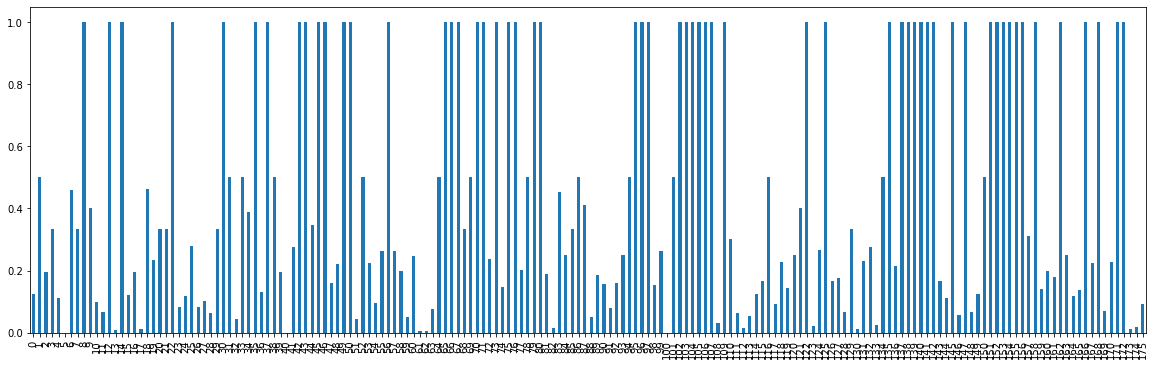

In [22]:
df_vpin['vpin'].plot.bar(figsize=(20, 6))

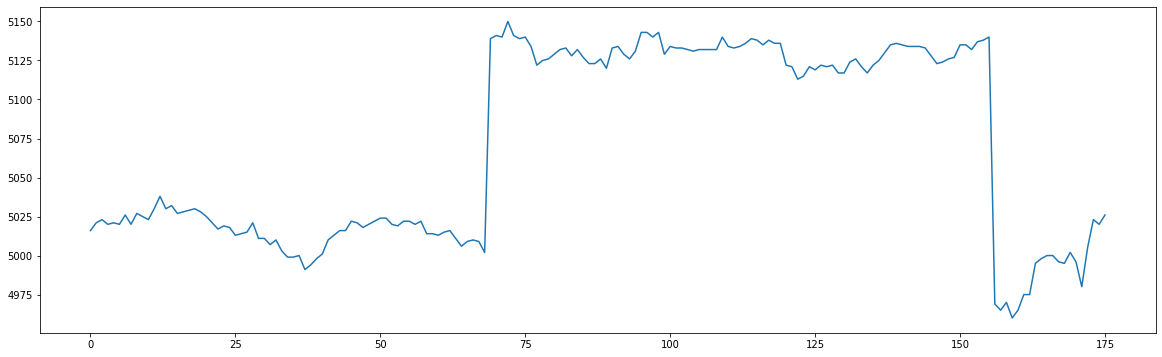

In [23]:
df_vpin['close'].plot(figsize=(20, 6))

#### 升级版VPIN，支持每天按指定数量分桶

In [41]:
reload(info)
df_ohlcv = rs.OHLCVSampler('1T', price_col='last_price',vol_col='qty').fit_transform(df).dropna(subset=['qty'])  # 1分钟ohlcv数据
df_vpin = info.Vpin(bin_num=50, drop_vol_na=True).fit_transform(df_ohlcv.reset_index())  # 每天分50个桶，并且丢弃交易量是空或者为0的行
df_vpin

bin             tx_time    open    high     low   close  vol_bin  \
0      1 2020-12-07 09:17:00  5019.0  5024.0  5014.0  5019.0       39   
1      2 2020-12-07 09:22:00  5019.0  5024.0  5016.0  5021.0       90   
2      3 2020-12-07 09:26:00  5021.0  5024.0  5016.0  5021.0       62   
3      4 2020-12-07 09:31:00  5021.0  5027.0  5018.0  5026.0       71   
4      5 2020-12-07 09:34:00  5026.0  5027.0  5020.0  5020.0       28   
..   ...                 ...     ...     ...     ...     ...      ...   
116   46 2020-12-15 13:34:00  5000.0  5010.0  5000.0  5010.0       44   
117   47 2020-12-15 13:36:00  5010.0  5015.0  5010.0  5015.0        5   
118   48 2020-12-15 13:50:00  5015.0  5028.0  5014.0  5028.0       36   
119   49 2020-12-15 14:35:00  5028.0  5030.0  5005.0  5020.0       22   
120   50 2020-12-15 14:53:00  5020.0  5026.0  5015.0  5026.0       26   

     vol_buy  vol_sell  vol_buy_w  vol_sell_w   vol_rel      vpin  vpin_signed  
0         30         8   0.025123   -0.006375  0.018749  0.141026     0.141026  
1         45        45   0.017931   -0.009158  0.008773  0.000000     0.000000  
2         17        45   0.027113   -0.028683 -0.001570  0.112903    -0.112903  
3         58        13   0.060560   -0.002390  0.058169  0.126761     0.126761  
4          0        28   0.000000   -0.008557 -0.008557  0.333333    -0.333333  
..       ...       ...        ...         ...       ...       ...          ...  
116       44         0   0.180897    0.000000  0.180897  0.333333     0.333333  
117        4         1   0.003992    0.000000  0.003992  0.300000     0.300000  
118       17        19   0.012950   -0.004783  0.008167  0.007937    -0.007937  
119        8        14   0.010980   -0.006769  0.004211  0.038961    -0.038961  
120        7        19   0.005378    0.000000  0.005378  0.092308    -0.092308  

[121 rows x 14 columns]

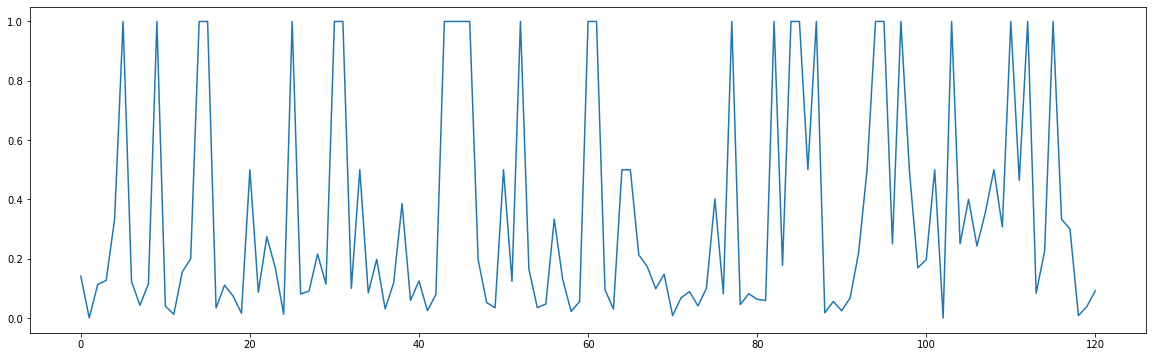

In [42]:
df_vpin['vpin'].plot(figsize=(20, 6))

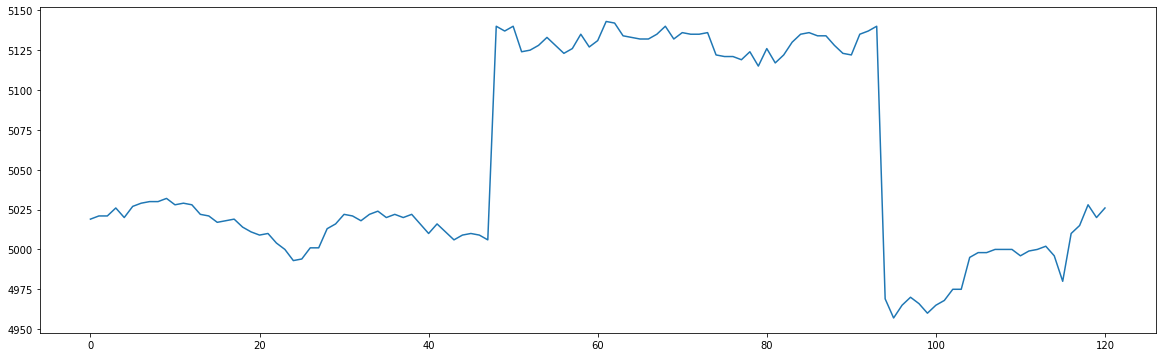

In [43]:
df_vpin['close'].plot(figsize=(20, 6))

# bar特征

In [36]:
reload(feat_eng)
from feat_eng import bar

In [40]:
reload(bar)
# 实体长度
trans = bar.BodyLength()
trans.fit_transform(df_ohlcv)

open    high     low   close  qty  boday_length
tx_time                                                               
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0           4.0
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0           0.0
2020-12-07 09:14:59  5015.0  5015.0  5015.0  5015.0  0.0           0.0
2020-12-07 09:15:00  5015.0  5015.0  5015.0  5015.0  0.0           0.0
2020-12-07 09:15:01  5015.0  5015.0  5015.0  5015.0  0.0           0.0
...                     ...     ...     ...     ...  ...           ...
2020-12-15 14:59:32     NaN     NaN     NaN     NaN  0.0           NaN
2020-12-15 14:59:33     NaN     NaN     NaN     NaN  0.0           NaN
2020-12-15 14:59:34     NaN     NaN     NaN     NaN  0.0           NaN
2020-12-15 14:59:35     NaN     NaN     NaN     NaN  0.0           NaN
2020-12-15 14:59:36  5026.0  5026.0  5026.0  5026.0  0.0           0.0

[711880 rows x 6 columns]

In [41]:
# 实体所占比例
trans = bar.BodyRatio()
trans.fit_transform(df_ohlcv)

open    high     low   close  qty  boday_ratio
tx_time                                                              
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0          1.0
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0          0.0
2020-12-07 09:14:59  5015.0  5015.0  5015.0  5015.0  0.0          0.0
2020-12-07 09:15:00  5015.0  5015.0  5015.0  5015.0  0.0          0.0
2020-12-07 09:15:01  5015.0  5015.0  5015.0  5015.0  0.0          0.0
...                     ...     ...     ...     ...  ...          ...
2020-12-15 14:59:32     NaN     NaN     NaN     NaN  0.0          NaN
2020-12-15 14:59:33     NaN     NaN     NaN     NaN  0.0          NaN
2020-12-15 14:59:34     NaN     NaN     NaN     NaN  0.0          NaN
2020-12-15 14:59:35     NaN     NaN     NaN     NaN  0.0          NaN
2020-12-15 14:59:36  5026.0  5026.0  5026.0  5026.0  0.0          0.0

[711880 rows x 6 columns]

In [63]:
reload(bar)
# 下影线长度
trans = bar.LowerShadow()
trans.fit_transform(df_ohlcv)

open    high     low   close  qty  lower_shadow
tx_time                                                               
2020-12-07 09:14:00  5019.0  5019.0  5015.0  5015.0    1           0.0
2020-12-07 09:15:00  5015.0  5024.0  5014.0  5020.0   18           1.0
2020-12-07 09:16:00  5020.0  5020.0  5016.0  5016.0    8           0.0
2020-12-07 09:17:00  5016.0  5022.0  5016.0  5019.0   12           0.0
2020-12-07 09:18:00  5019.0  5022.0  5016.0  5021.0   38           3.0
...                     ...     ...     ...     ...  ...           ...
2020-12-15 14:55:00     NaN     NaN     NaN     NaN    0           NaN
2020-12-15 14:56:00  5026.0  5026.0  5026.0  5026.0    0           0.0
2020-12-15 14:57:00  5026.0  5026.0  5026.0  5026.0    0           0.0
2020-12-15 14:58:00     NaN     NaN     NaN     NaN    0           NaN
2020-12-15 14:59:00  5026.0  5026.0  5026.0  5026.0    0           0.0

[11866 rows x 6 columns]

In [62]:
reload(bar)
# 上影线长度
trans = bar.UpperShadow()
trans.fit_transform(df_ohlcv)

open    high     low   close  qty  upper_shadow
tx_time                                                               
2020-12-07 09:14:00  5019.0  5019.0  5015.0  5015.0    1           0.0
2020-12-07 09:15:00  5015.0  5024.0  5014.0  5020.0   18           4.0
2020-12-07 09:16:00  5020.0  5020.0  5016.0  5016.0    8           0.0
2020-12-07 09:17:00  5016.0  5022.0  5016.0  5019.0   12           3.0
2020-12-07 09:18:00  5019.0  5022.0  5016.0  5021.0   38           1.0
...                     ...     ...     ...     ...  ...           ...
2020-12-15 14:55:00     NaN     NaN     NaN     NaN    0           NaN
2020-12-15 14:56:00  5026.0  5026.0  5026.0  5026.0    0           0.0
2020-12-15 14:57:00  5026.0  5026.0  5026.0  5026.0    0           0.0
2020-12-15 14:58:00     NaN     NaN     NaN     NaN    0           NaN
2020-12-15 14:59:00  5026.0  5026.0  5026.0  5026.0    0           0.0

[11866 rows x 6 columns]

# label

#### 交叉

In [7]:
from importlib import reload
from feat_eng import ta
from feat_eng import base
from feat_eng import label
from feat_eng import resample as rs
from sklearn.pipeline import make_pipeline
reload(base)
reload(ta)
reload(label)
# MA金叉死叉
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
ma5 = ta.MA('close', n=5)
ma10 = ta.MA('close', n=10)
df_ma = make_pipeline(ma5, ma10).fit_transform(df_ohlcv)
trans_label = label.Cross(ma5.get_new_cols()[0], ma10.get_new_cols()[0]).config('name_args', ('ma', '5', '10'))
trans_label.fit_transform(df_ma).head()

open    high     low   close  qty  ma_close_5  \
tx_time                                                                
2021-04-29 09:01:33  5551.0  5551.0  5551.0  5551.0  NaN         NaN   
2021-04-29 09:01:34  5552.0  5552.0  5552.0  5552.0  1.0         NaN   
2021-04-29 09:01:35  5552.0  5552.0  5551.0  5551.0  1.0         NaN   
2021-04-29 09:01:36  5551.0  5551.0  5551.0  5551.0  0.0         NaN   
2021-04-29 09:01:37  5551.0  5551.0  5551.0  5551.0  0.0      5551.2   

                     ma_close_10  label_ma_5_10  
tx_time                                          
2021-04-29 09:01:33          NaN            NaN  
2021-04-29 09:01:34          NaN            NaN  
2021-04-29 09:01:35          NaN            NaN  
2021-04-29 09:01:36          NaN            NaN  
2021-04-29 09:01:37          NaN            NaN

In [156]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
# EMA金叉死叉
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
ema5 = ta.EMA('close', n=5)
ema10 = ta.EMA('close', n=10)
df_ema = make_pipeline(ema5, ema10).fit_transform(df_ohlcv)
trans_label = label.Cross(ema5.get_new_cols()[0], ema10.get_new_cols()[0]).config('name_args', ('ema', '5', '10'))
trans_label.fit_transform(df_ema).head()

open    high     low   close  qty  ema_close_5  \
tx_time                                                                 
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN  5019.000000   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN  5019.000000   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN  5019.000000   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0  5016.882353   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0  5016.254902   

                     ema_close_10  label_ema_5_10  
tx_time                                            
2020-12-07 09:14:54   5019.000000            -1.0  
2020-12-07 09:14:55   5019.000000            -1.0  
2020-12-07 09:14:56   5019.000000            -1.0  
2020-12-07 09:14:57   5018.003090            -1.0  
2020-12-07 09:14:58   5017.457073            -1.0

In [153]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
# MACD金叉死叉
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
trans_macd = ta.MACD()
df_macd = trans_macd.fit_transform(df_ohlcv)
cols = trans_macd.get_new_cols()
trans_label = label.Cross(cols[0], cols[1]).config('name_args', (cols[-1],))
trans_label.fit_transform(df_macd).head()

open    high     low   close  qty  dif_close_9_12_26  \
tx_time                                                                       
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN           0.000000   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN           0.000000   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN           0.000000   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0          -0.468674   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0          -0.688425   

                     dea_close_9_12_26  macd_close_9_12_26  \
tx_time                                                      
2020-12-07 09:14:54           0.000000            0.000000   
2020-12-07 09:14:55           0.000000            0.000000   
2020-12-07 09:14:56           0.000000            0.000000   
2020-12-07 09:14:57          -0.093735           -0.749878   
2020-12-07 09:14:58          -0.212673           -0.951504   

                     label_macd_close_9_12_26  
tx_time                                        
2020-12-07 09:14:54                      -1.0  
2020-12-07 09:14:55                      -1.0  
2020-12-07 09:14:56                      -1.0  
2020-12-07 09:14:57                      -1.0  
2020-12-07 09:14:58                      -1.0

In [154]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
trans_label = label.make_macd_cross(trans=trans_macd)  # 使用封装好的方法
trans_label.fit_transform(df_macd).head()

open    high     low   close  qty  dif_close_9_12_26  \
tx_time                                                                       
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN           0.000000   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN           0.000000   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN           0.000000   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0          -0.468674   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0          -0.688425   

                     dea_close_9_12_26  macd_close_9_12_26  \
tx_time                                                      
2020-12-07 09:14:54           0.000000            0.000000   
2020-12-07 09:14:55           0.000000            0.000000   
2020-12-07 09:14:56           0.000000            0.000000   
2020-12-07 09:14:57          -0.093735           -0.749878   
2020-12-07 09:14:58          -0.212673           -0.951504   

                     label_macd_close_9_12_26  
tx_time                                        
2020-12-07 09:14:54                      -1.0  
2020-12-07 09:14:55                      -1.0  
2020-12-07 09:14:56                      -1.0  
2020-12-07 09:14:57                      -1.0  
2020-12-07 09:14:58                      -1.0

In [143]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
from feat_eng import utils
from feat_eng import resample as rs
reload(utils)
reload(base)
reload(ta)
reload(label)

# kdj
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
feat = ta.KDJ()
df_feat = feat.fit_transform(df_ohlcv)
cols = feat.get_new_cols()
trans_label = label.Cross(cols[0], cols[1]).config('name_args', ('kdj_cross', str(feat.n)))
trans_label.fit_transform(df_feat)

open    high     low   close  qty        k_9  \
tx_time                                                               
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN  50.000000   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN        NaN   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN        NaN   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0   0.000000   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0   0.000000   
...                     ...     ...     ...     ...  ...        ...   
2020-12-15 14:59:32     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:33     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:34     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:35     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:36  5026.0  5026.0  5026.0  5026.0  0.0  16.064257   

                           d_9        j_9  label_kdj_cross_9  
tx_time                                                       
2020-12-07 09:14:54  50.000000  50.000000               -1.0  
2020-12-07 09:14:55        NaN        NaN                NaN  
2020-12-07 09:14:56        NaN        NaN                NaN  
2020-12-07 09:14:57   0.000000   0.000000               -1.0  
2020-12-07 09:14:58   0.000000   0.000000               -1.0  
...                        ...        ...                ...  
2020-12-15 14:59:32        NaN        NaN                NaN  
2020-12-15 14:59:33        NaN        NaN                NaN  
2020-12-15 14:59:34        NaN        NaN                NaN  
2020-12-15 14:59:35        NaN        NaN                NaN  
2020-12-15 14:59:36   5.354752  37.483266                1.0  

[711883 rows x 9 columns]

In [144]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
trans_label = label.make_kdj_cross(trans=feat)  # 使用封装好的方法
trans_label.fit_transform(df_feat).head()

open    high     low   close  qty   k_9   d_9   j_9  \
tx_time                                                                      
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN  50.0  50.0  50.0   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN   NaN   NaN   NaN   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN   NaN   NaN   NaN   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0   0.0   0.0   0.0   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0   0.0   0.0   0.0   

                     label_kdj_cross_9  
tx_time                                 
2020-12-07 09:14:54               -1.0  
2020-12-07 09:14:55                NaN  
2020-12-07 09:14:56                NaN  
2020-12-07 09:14:57               -1.0  
2020-12-07 09:14:58               -1.0

#### 分段

In [106]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
from feat_eng import utils
from feat_eng import resample as rs
reload(utils)
reload(base)
reload(ta)
reload(label)

# 分段
# cci
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
feat = ta.CCI_A()
df_feat = feat.fit_transform(df_ohlcv)
# df_cci.head()
col = feat.get_new_cols()[0]
trans_label = label.Segment(col=col, bounds=(0, 20, 80, float('inf')), labels=(-1, 0, 1)).config('name_args', (col, ))
trans_label.fit_transform(df_feat).query('cci_9 > 0')

open    high     low   close  qty       cci_9  \
tx_time                                                                
2020-12-07 10:35:23  5011.0  5011.0  5011.0  5011.0  0.0   13.186813   
2020-12-07 10:35:24  5011.0  5011.0  5011.0  5011.0  0.0   21.774194   
2020-12-07 10:35:25  5011.0  5011.0  5011.0  5011.0  0.0   28.037383   
2020-12-07 10:35:26  5011.0  5011.0  5011.0  5011.0  0.0   27.450980   
2020-12-07 10:35:27  5011.0  5011.0  5011.0  5011.0  0.0   19.565217   
2020-12-07 13:34:19  5015.0  5015.0  5015.0  5015.0  0.0  140.000000   
2020-12-08 09:00:24  5132.0  5132.0  5132.0  5132.0  0.0   16.666667   
2020-12-08 09:00:49  5137.0  5137.0  5137.0  5137.0  0.0   52.777778   
2020-12-08 09:00:50  5137.0  5137.0  5137.0  5137.0  0.0   33.962264   
2020-12-08 14:30:20  5136.0  5136.0  5136.0  5136.0  3.0  240.000000   
2020-12-15 13:30:56  5005.0  5005.0  5005.0  5005.0  0.0   28.037383   
2020-12-15 13:30:57  5005.0  5005.0  5005.0  5005.0  0.0   11.214953   
2020-12-15 13:30:58  5005.0  5005.0  5005.0  5005.0  0.0    6.521739   

                    label_cci_9  
tx_time                          
2020-12-07 10:35:23          -1  
2020-12-07 10:35:24           0  
2020-12-07 10:35:25           0  
2020-12-07 10:35:26           0  
2020-12-07 10:35:27          -1  
2020-12-07 13:34:19           1  
2020-12-08 09:00:24          -1  
2020-12-08 09:00:49           0  
2020-12-08 09:00:50           0  
2020-12-08 14:30:20           1  
2020-12-15 13:30:56           0  
2020-12-15 13:30:57          -1  
2020-12-15 13:30:58          -1

In [112]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
trans_label = label.make_cci_segment(trans=feat)  # 使用封装好的方法
trans_label.fit_transform(df_feat).head()

open    high     low   close  qty  cci_9 label_cci_9
tx_time                                                                    
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN    NaN         NaN
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN    NaN         NaN
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN    NaN         NaN
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0    NaN         NaN
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0    NaN         NaN

In [132]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
from feat_eng import utils
from feat_eng import resample as rs
reload(utils)
reload(base)
reload(ta)
reload(label)

# 分段
# kdj
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
feat = ta.KDJ()
df_feat = feat.fit_transform(df_ohlcv)
# df_cci.head()
col = feat.get_new_cols()[1]
trans_label = label.Segment(col=col, bounds=(0, 30, 70, float('inf')), labels=(-1, 0, 1)).config('name_args', ('kdj_seg', str(feat.n)))
trans_label.fit_transform(df_feat)

open    high     low   close  qty        k_9  \
tx_time                                                               
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN  50.000000   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN        NaN   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN        NaN   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0   0.000000   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0   0.000000   
...                     ...     ...     ...     ...  ...        ...   
2020-12-15 14:59:32     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:33     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:34     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:35     NaN     NaN     NaN     NaN  0.0        NaN   
2020-12-15 14:59:36  5026.0  5026.0  5026.0  5026.0  0.0  16.064257   

                           d_9        j_9 label_kdj_seg_9  
tx_time                                                    
2020-12-07 09:14:54  50.000000  50.000000               0  
2020-12-07 09:14:55        NaN        NaN             NaN  
2020-12-07 09:14:56        NaN        NaN             NaN  
2020-12-07 09:14:57   0.000000   0.000000              -1  
2020-12-07 09:14:58   0.000000   0.000000              -1  
...                        ...        ...             ...  
2020-12-15 14:59:32        NaN        NaN             NaN  
2020-12-15 14:59:33        NaN        NaN             NaN  
2020-12-15 14:59:34        NaN        NaN             NaN  
2020-12-15 14:59:35        NaN        NaN             NaN  
2020-12-15 14:59:36   5.354752  37.483266              -1  

[711883 rows x 9 columns]

In [138]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
trans_label = label.make_kdj_segment(trans=feat)  # 使用封装好的方法
trans_label.fit_transform(df_feat).head()

open    high     low   close  qty   k_9   d_9   j_9  \
tx_time                                                                      
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN  50.0  50.0  50.0   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN   NaN   NaN   NaN   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN   NaN   NaN   NaN   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0   0.0   0.0   0.0   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0   0.0   0.0   0.0   

                    label_kdj_seg_9  
tx_time                              
2020-12-07 09:14:54               0  
2020-12-07 09:14:55             NaN  
2020-12-07 09:14:56             NaN  
2020-12-07 09:14:57              -1  
2020-12-07 09:14:58              -1

In [146]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
from feat_eng import utils
from feat_eng import resample as rs
reload(utils)
reload(base)
reload(ta)
reload(label)

# 分段
# rsi
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
feat = ta.RSI(col='close')
df_feat = feat.fit_transform(df_ohlcv)
col = feat.get_new_cols()[0]
trans_label = label.Segment(col=col, bounds=(0, 10, 90, 100), labels=(-1, 0, 1)).config('name_args', ('rsi', str(feat.n)))
trans_label.fit_transform(df_feat)

open    high     low   close  qty  rsi_close_9  \
tx_time                                                                 
2020-12-07 09:14:54  5019.0  5019.0  5019.0  5019.0  NaN          NaN   
2020-12-07 09:14:55     NaN     NaN     NaN     NaN  NaN          NaN   
2020-12-07 09:14:56     NaN     NaN     NaN     NaN  NaN          NaN   
2020-12-07 09:14:57  5019.0  5019.0  5015.0  5015.0  1.0          NaN   
2020-12-07 09:14:58  5015.0  5015.0  5015.0  5015.0  0.0          NaN   
...                     ...     ...     ...     ...  ...          ...   
2020-12-15 14:59:32     NaN     NaN     NaN     NaN  0.0          NaN   
2020-12-15 14:59:33     NaN     NaN     NaN     NaN  0.0          NaN   
2020-12-15 14:59:34     NaN     NaN     NaN     NaN  0.0          NaN   
2020-12-15 14:59:35     NaN     NaN     NaN     NaN  0.0          NaN   
2020-12-15 14:59:36  5026.0  5026.0  5026.0  5026.0  0.0          NaN   

                    label_rsi_9  
tx_time                          
2020-12-07 09:14:54         NaN  
2020-12-07 09:14:55         NaN  
2020-12-07 09:14:56         NaN  
2020-12-07 09:14:57         NaN  
2020-12-07 09:14:58         NaN  
...                         ...  
2020-12-15 14:59:32         NaN  
2020-12-15 14:59:33         NaN  
2020-12-15 14:59:34         NaN  
2020-12-15 14:59:35         NaN  
2020-12-15 14:59:36         NaN  

[711883 rows x 7 columns]

In [148]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
trans_label = label.make_rsi_segment(trans=feat)  # 使用封装好的方法
trans_label.fit_transform(df_feat).query('rsi_close_9 > 0')

open    high     low   close  qty  rsi_close_9  \
tx_time                                                                 
2020-12-07 09:30:17  5027.0  5027.0  5027.0  5027.0  0.0   100.000000   
2020-12-07 09:30:18  5027.0  5027.0  5027.0  5027.0  0.0   100.000000   
2020-12-07 09:36:07  5028.0  5028.0  5028.0  5028.0  1.0   100.000000   
2020-12-07 09:36:08  5028.0  5028.0  5028.0  5028.0  0.0   100.000000   
2020-12-07 10:35:20  5007.0  5012.0  5007.0  5012.0  1.0    33.333333   
...                     ...     ...     ...     ...  ...          ...   
2020-12-15 13:30:55  5005.0  5005.0  5005.0  5005.0  0.0   100.000000   
2020-12-15 13:30:56  5005.0  5005.0  5005.0  5005.0  0.0   100.000000   
2020-12-15 13:30:57  5005.0  5005.0  5005.0  5005.0  0.0   100.000000   
2020-12-15 13:30:58  5005.0  5005.0  5005.0  5005.0  0.0   100.000000   
2020-12-15 13:30:59  5005.0  5005.0  5005.0  5005.0  0.0   100.000000   

                    label_rsi_9  
tx_time                          
2020-12-07 09:30:17           1  
2020-12-07 09:30:18           1  
2020-12-07 09:36:07           1  
2020-12-07 09:36:08           1  
2020-12-07 10:35:20           0  
...                         ...  
2020-12-15 13:30:55           1  
2020-12-15 13:30:56           1  
2020-12-15 13:30:57           1  
2020-12-15 13:30:58           1  
2020-12-15 13:30:59           1  

[166 rows x 7 columns]

#### 动态分段

In [152]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
from feat_eng import utils
from feat_eng import resample as rs
reload(utils)
reload(base)
reload(ta)
reload(label)

# 动态分段
# bollin
df_ohlcv = rs.OHLCVSampler().fit_transform(df)
feat = ta.Bollin()
df_feat = feat.fit_transform(df_ohlcv)
# df_feat.head()
cols = feat.get_new_cols()
trans_label = label.DynamicSegment(col='close', bounds=cols[::-1], labels=(0, 1, 2, 3)).config('name_args', ('bollin', str(feat.n), str(feat.m)))
trans_label.fit_transform(df_feat).query('middle_close_9_2 > 0')

open    high     low   close  qty  upper_close_9_2  \
tx_time                                                                     
2020-12-07 09:16:42  5017.0  5017.0  5017.0  5017.0  0.0      5018.609648   
2020-12-07 09:16:43  5017.0  5017.0  5017.0  5017.0  0.0      5018.498537   
2020-12-07 09:17:01  5016.0  5016.0  5016.0  5016.0  0.0      5017.104139   
2020-12-07 09:17:02  5016.0  5016.0  5016.0  5016.0  0.0      5016.777778   
2020-12-07 09:17:03  5016.0  5016.0  5016.0  5016.0  0.0      5016.000000   
...                     ...     ...     ...     ...  ...              ...   
2020-12-15 13:30:56  5005.0  5005.0  5005.0  5005.0  0.0      5006.472032   
2020-12-15 13:30:57  5005.0  5005.0  5005.0  5005.0  0.0      5005.659695   
2020-12-15 13:30:58  5005.0  5005.0  5005.0  5005.0  0.0      5005.555556   
2020-12-15 13:30:59  5005.0  5005.0  5005.0  5005.0  0.0      5005.000005   
2020-12-15 13:37:16  5015.0  5015.0  5015.0  5015.0  2.0      5015.609648   

                     middle_close_9_2  lower_close_9_2  label_bollin_9_2  
tx_time                                                                   
2020-12-07 09:16:42       5017.555556      5016.501463               3.0  
2020-12-07 09:16:43       5017.444444      5016.390352               3.0  
2020-12-07 09:17:01       5016.222222      5015.340305               3.0  
2020-12-07 09:17:02       5016.111111      5015.444444               3.0  
2020-12-07 09:17:03       5016.000000      5016.000000               3.0  
...                               ...              ...               ...  
2020-12-15 13:30:56       5004.444444      5002.416857               3.0  
2020-12-15 13:30:57       5004.777778      5003.895861               3.0  
2020-12-15 13:30:58       5004.888889      5004.222222               3.0  
2020-12-15 13:30:59       5005.000000      5004.999995               3.0  
2020-12-15 13:37:16       5014.555556      5013.501463               3.0  

[469 rows x 9 columns]

In [151]:
from feat_eng import ta
from feat_eng import base
from feat_eng import label
reload(base)
reload(ta)
reload(label)
trans_label = label.make_bolling_segment(trans=feat)  # 使用封装好的方法
trans_label.fit_transform(df_feat).query('middle_close_9_2 > 0')

open    high     low   close  qty  upper_close_9_2  \
tx_time                                                                     
2020-12-07 09:16:42  5017.0  5017.0  5017.0  5017.0  0.0      5018.609648   
2020-12-07 09:16:43  5017.0  5017.0  5017.0  5017.0  0.0      5018.498537   
2020-12-07 09:17:01  5016.0  5016.0  5016.0  5016.0  0.0      5017.104139   
2020-12-07 09:17:02  5016.0  5016.0  5016.0  5016.0  0.0      5016.777778   
2020-12-07 09:17:03  5016.0  5016.0  5016.0  5016.0  0.0      5016.000000   
...                     ...     ...     ...     ...  ...              ...   
2020-12-15 13:30:56  5005.0  5005.0  5005.0  5005.0  0.0      5006.472032   
2020-12-15 13:30:57  5005.0  5005.0  5005.0  5005.0  0.0      5005.659695   
2020-12-15 13:30:58  5005.0  5005.0  5005.0  5005.0  0.0      5005.555556   
2020-12-15 13:30:59  5005.0  5005.0  5005.0  5005.0  0.0      5005.000005   
2020-12-15 13:37:16  5015.0  5015.0  5015.0  5015.0  2.0      5015.609648   

                     middle_close_9_2  lower_close_9_2  label_bollin_9_2  
tx_time                                                                   
2020-12-07 09:16:42       5017.555556      5016.501463               3.0  
2020-12-07 09:16:43       5017.444444      5016.390352               3.0  
2020-12-07 09:17:01       5016.222222      5015.340305               3.0  
2020-12-07 09:17:02       5016.111111      5015.444444               3.0  
2020-12-07 09:17:03       5016.000000      5016.000000               3.0  
...                               ...              ...               ...  
2020-12-15 13:30:56       5004.444444      5002.416857               3.0  
2020-12-15 13:30:57       5004.777778      5003.895861               3.0  
2020-12-15 13:30:58       5004.888889      5004.222222               3.0  
2020-12-15 13:30:59       5005.000000      5004.999995               3.0  
2020-12-15 13:37:16       5014.555556      5013.501463               3.0  

[469 rows x 9 columns]

#### 栅格法

In [9]:
# 栅格（三分类）
from feat_eng import label
trans = label.TripleGrid(new_col='y', col='close', n=5, upper=0.002, lower=-0.002)
trans.fit_transform(df_ohlcv)

open    high     low   close  qty    y
tx_time                                                      
2021-04-29 09:01:33  5551.0  5551.0  5551.0  5551.0  NaN  0.0
2021-04-29 09:01:34  5552.0  5552.0  5552.0  5552.0  1.0  0.0
2021-04-29 09:01:35  5552.0  5552.0  5551.0  5551.0  1.0  0.0
2021-04-29 09:01:36  5551.0  5551.0  5551.0  5551.0  0.0  0.0
2021-04-29 09:01:37  5551.0  5551.0  5551.0  5551.0  0.0  0.0
...                     ...     ...     ...     ...  ...  ...
2021-04-30 14:59:55  5441.0  5441.0  5441.0  5441.0  0.0  NaN
2021-04-30 14:59:56  5444.0  5444.0  5441.0  5441.0  4.0  NaN
2021-04-30 14:59:57  5444.0  5444.0  5444.0  5444.0  0.0  NaN
2021-04-30 14:59:58  5442.0  5443.0  5442.0  5442.0  3.0  NaN
2021-04-30 14:59:59  5444.0  5444.0  5444.0  5444.0  0.0  NaN

[107907 rows x 6 columns]

In [10]:
# 栅格（四分类）
from feat_eng import label
trans = label.QuadraGrid(new_col='y', col='close', n=5, upper=0.002, lower=-0.002, labels=(0, 1, 2, 3))
trans.fit_transform(df_ohlcv)

open    high     low   close  qty    y
tx_time                                                      
2021-04-29 09:01:33  5551.0  5551.0  5551.0  5551.0  NaN  2.0
2021-04-29 09:01:34  5552.0  5552.0  5552.0  5552.0  1.0  2.0
2021-04-29 09:01:35  5552.0  5552.0  5551.0  5551.0  1.0  2.0
2021-04-29 09:01:36  5551.0  5551.0  5551.0  5551.0  0.0  2.0
2021-04-29 09:01:37  5551.0  5551.0  5551.0  5551.0  0.0  2.0
...                     ...     ...     ...     ...  ...  ...
2021-04-30 14:59:55  5441.0  5441.0  5441.0  5441.0  0.0  NaN
2021-04-30 14:59:56  5444.0  5444.0  5441.0  5441.0  4.0  NaN
2021-04-30 14:59:57  5444.0  5444.0  5444.0  5444.0  0.0  NaN
2021-04-30 14:59:58  5442.0  5443.0  5442.0  5442.0  3.0  NaN
2021-04-30 14:59:59  5444.0  5444.0  5444.0  5444.0  0.0  NaN

[107907 rows x 6 columns]

In [8]:
# 动态栅格（三分类）
from feat_eng import label
trans = label.DynTripleGrid(new_col='y', col='close', n=5, span=50, alpha_u=1, alpha_d=1)
trans.fit_transform(df_ohlcv)

open    high     low   close  qty    y
tx_time                                                      
2021-04-29 09:01:33  5551.0  5551.0  5551.0  5551.0  NaN  0.0
2021-04-29 09:01:34  5552.0  5552.0  5552.0  5552.0  1.0  0.0
2021-04-29 09:01:35  5552.0  5552.0  5551.0  5551.0  1.0 -1.0
2021-04-29 09:01:36  5551.0  5551.0  5551.0  5551.0  0.0 -1.0
2021-04-29 09:01:37  5551.0  5551.0  5551.0  5551.0  0.0 -1.0
...                     ...     ...     ...     ...  ...  ...
2021-04-30 14:59:55  5441.0  5441.0  5441.0  5441.0  0.0  NaN
2021-04-30 14:59:56  5444.0  5444.0  5441.0  5441.0  4.0  NaN
2021-04-30 14:59:57  5444.0  5444.0  5444.0  5444.0  0.0  NaN
2021-04-30 14:59:58  5442.0  5443.0  5442.0  5442.0  3.0  NaN
2021-04-30 14:59:59  5444.0  5444.0  5444.0  5444.0  0.0  NaN

[107907 rows x 6 columns]

# momentum

In [45]:
reload(feat_eng)
from feat_eng import momentum as mnt
reload(mnt)
# 累计收益率
trans = mnt.AccumulatedReturns(col='last_price')
trans.fit_transform(df).head()


best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-07 09:14:54.713                6  ...                2   
2020-12-07 09:14:57.507                2  ...                2   
2020-12-07 09:14:57.756                6  ...                2   
2020-12-07 09:14:58.258                6  ...                2   
2020-12-07 09:14:58.762                6  ...                2   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-07 09:14:54.713            5010.0               14            5030.0   
2020-12-07 09:14:57.507            5003.0               16            5028.0   
2020-12-07 09:14:57.756            5010.0               14            5030.0   
2020-12-07 09:14:58.258            5010.0               14            5030.0   
2020-12-07 09:14:58.762            5010.0               14            5030.0   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-07 09:14:54.713                2      5019.0         10336   
2020-12-07 09:14:57.507                2      5019.0         10336   
2020-12-07 09:14:57.756                2      5015.0         10338   
2020-12-07 09:14:58.258                2      5015.0         10338   
2020-12-07 09:14:58.762                2      5015.0         10338   

                         clear_price  open_interest  acc_ret_last_price_1_0  
tx_time                                                                      
2020-12-07 09:14:54.713          0.0          67808                     NaN  
2020-12-07 09:14:57.507          0.0          67808                0.000000  
2020-12-07 09:14:57.756          0.0          67806               -0.000797  
2020-12-07 09:14:58.258          0.0          67806                0.000000  
2020-12-07 09:14:58.762          0.0          67806                0.000000  

[5 rows x 25 columns]

In [47]:
reload(feat_eng)
from feat_eng import momentum as mnt
reload(mnt)
# 是否在过去n个数据点内创新高
trans = mnt.NewHigh(col='last_price')
trans.fit_transform(df).head()

best_bid_price_1  best_bid_size_1  best_ask_price_1  \
tx_time                                                                        
2020-12-07 09:14:54.713            5015.0                2            5020.0   
2020-12-07 09:14:57.507            5014.0               28            5015.0   
2020-12-07 09:14:57.756            5015.0                2            5020.0   
2020-12-07 09:14:58.258            5015.0                4            5020.0   
2020-12-07 09:14:58.762            5015.0                8            5020.0   

                         best_ask_size_1  best_bid_price_2  best_bid_size_2  \
tx_time                                                                       
2020-12-07 09:14:54.713                4            5014.0               24   
2020-12-07 09:14:57.507                2            5013.0                6   
2020-12-07 09:14:57.756                2            5014.0               28   
2020-12-07 09:14:58.258                4            5014.0               28   
2020-12-07 09:14:58.762                2            5014.0               24   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-07 09:14:54.713            5024.0                2            5013.0   
2020-12-07 09:14:57.507            5020.0                4            5012.0   
2020-12-07 09:14:57.756            5024.0                2            5013.0   
2020-12-07 09:14:58.258            5024.0                2            5013.0   
2020-12-07 09:14:58.762            5024.0                2            5013.0   

                         best_bid_size_3  ...  best_ask_size_4  \
tx_time                                   ...                    
2020-12-07 09:14:54.713                6  ...                2   
2020-12-07 09:14:57.507                2  ...                2   
2020-12-07 09:14:57.756                6  ...                2   
2020-12-07 09:14:58.258                6  ...                2   
2020-12-07 09:14:58.762                6  ...                2   

                         best_bid_price_5  best_bid_size_5  best_ask_price_5  \
tx_time                                                                        
2020-12-07 09:14:54.713            5010.0               14            5030.0   
2020-12-07 09:14:57.507            5003.0               16            5028.0   
2020-12-07 09:14:57.756            5010.0               14            5030.0   
2020-12-07 09:14:58.258            5010.0               14            5030.0   
2020-12-07 09:14:58.762            5010.0               14            5030.0   

                         best_ask_size_5  last_price  matchtot_qty  \
tx_time                                                              
2020-12-07 09:14:54.713                2      5019.0         10336   
2020-12-07 09:14:57.507                2      5019.0         10336   
2020-12-07 09:14:57.756                2      5015.0         10338   
2020-12-07 09:14:58.258                2      5015.0         10338   
2020-12-07 09:14:58.762                2      5015.0         10338   

                         clear_price  open_interest  new_high_last_price_1_0  
tx_time                                                                       
2020-12-07 09:14:54.713          0.0          67808                    False  
2020-12-07 09:14:57.507          0.0          67808                    False  
2020-12-07 09:14:57.756          0.0          67806                    False  
2020-12-07 09:14:58.258          0.0          67806                    False  
2020-12-07 09:14:58.762          0.0          67806                    False  

[5 rows x 25 columns]

In [52]:
%%time
reload(feat_eng)
from feat_eng import momentum as mnt
reload(mnt)
# 是否在过去n个数据点内信息分散系数
trans = mnt.InfomationDiversity(col='last_price', criteria=0.05)
trans.fit_transform(df).tail(50)

Wall time: 16.9 s


134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:35:16.257            5030.0               14            5005.0   
2020-12-15 14:35:25.010            5030.0               14            5005.0   
2020-12-15 14:35:26.011               NaN                0            5005.0   
2020-12-15 14:35:31.262               NaN                0            5005.0   
2020-12-15 14:35:32.513            5025.0              134            5005.0   
2020-12-15 14:35:37.008            5025.0              134            5005.0   
2020-12-15 14:35:41.524               NaN                0            5005.0   
2020-12-15 14:35:45.085               NaN                0            4970.0   
2020-12-15 14:35:46.319               NaN                0            4970.0   
2020-12-15 14:35:46.821               NaN                0            4970.0   
2020-12-15 14:36:10.399               NaN                0            4970.0   
2020-12-15 14:36:10.898               NaN                0            4970.0   
2020-12-15 14:36:11.899               NaN                0            4970.0   
2020-12-15 14:36:43.933               NaN                0            5005.0   
2020-12-15 14:38:06.318               NaN                0            4970.0   
2020-12-15 14:45:25.338               NaN                0            4970.0   
2020-12-15 14:46:33.779               NaN                0            5005.0   
2020-12-15 14:47:26.464               NaN                0            5012.0   
2020-12-15 14:47:28.467               NaN                0            4970.0   
2020-12-15 14:47:51.974               NaN                0            4970.0   
2020-12-15 14:47:53.730            5030.0              134            4970.0   
2020-12-15 14:47:57.733            5030.0              134            4970.0   
2020-12-15 14:47:58.481            5030.0              134            4970.0   
2020-12-15 14:47:59.491            5030.0              134            4970.0   
2020-12-15 14:48:01.352               NaN                0            4970.0   
2020-12-15 14:48:15.864               NaN                0            5005.0   
2020-12-15 14:48:37.445               NaN                0            5012.0   
2020-12-15 14:48:42.953               NaN                0            5005.0   
2020-12-15 14:48:45.942               NaN                0            5005.0   
2020-12-15 14:48:46.953               NaN                0            5015.0   
2020-12-15 14:48:48.947               NaN                0            5015.0   
2020-12-15 14:48:52.947               NaN                0            5015.0   
2020-12-15 14:48:54.451               NaN                0            5015.0   
2020-12-15 14:49:02.807               NaN                0            5015.0   
2020-12-15 14:49:07.053               NaN                0            4970.0   
2020-12-15 14:49:56.391            5030.0              134            4970.0   
2020-12-15 14:50:10.474            5030.0              134            4970.0   
2020-12-15 14:50:10.971            5030.0              134            4970.0   
2020-12-15 14:50:11.225            5030.0              134            4970.0   
2020-12-15 14:50:11.974            5030.0              134            4970.0   
2020-12-15 14:50:17.228               NaN                0            4970.0   
2020-12-15 14:50:45.379               NaN                0            5020.0   
2020-12-15 14:50:53.881               NaN                0            5022.0   
2020-12-15 14:53:52.511               NaN

In [60]:
%%time
reload(feat_eng)
from feat_eng import momentum as mnt
reload(mnt)
# 是否在过去n个数据点内信息分散系数
trans = mnt.InfomationDiversity(col='last_price', criteria=0.05)
trans.fit_transform(df).tail(50)

Wall time: 30 ms


134            5026.0                4   
2020-12-15 14:56:55.461              134            5026.0                4   
2020-12-15 14:57:01.370              134            5028.0                8   
2020-12-15 14:57:19.938              134            5022.0               10   
2020-12-15 14:59:36.310              134            5015.0               10   

                         best_ask_price_2  best_ask_size_2  best_bid_price_3  \
tx_time                                                                        
2020-12-15 14:35:16.257            5030.0               14            5005.0   
2020-12-15 14:35:25.010            5030.0               14            5005.0   
2020-12-15 14:35:26.011               NaN                0            5005.0   
2020-12-15 14:35:31.262               NaN                0            5005.0   
2020-12-15 14:35:32.513            5025.0              134            5005.0   
2020-12-15 14:35:37.008            5025.0              134            5005.0   
2020-12-15 14:35:41.524               NaN                0            5005.0   
2020-12-15 14:35:45.085               NaN                0            4970.0   
2020-12-15 14:35:46.319               NaN                0            4970.0   
2020-12-15 14:35:46.821               NaN                0            4970.0   
2020-12-15 14:36:10.399               NaN                0            4970.0   
2020-12-15 14:36:10.898               NaN                0            4970.0   
2020-12-15 14:36:11.899               NaN                0            4970.0   
2020-12-15 14:36:43.933               NaN                0            5005.0   
2020-12-15 14:38:06.318               NaN                0            4970.0   
2020-12-15 14:45:25.338               NaN                0            4970.0   
2020-12-15 14:46:33.779               NaN                0            5005.0   
2020-12-15 14:47:26.464               NaN                0            5012.0   
2020-12-15 14:47:28.467               NaN                0            4970.0   
2020-12-15 14:47:51.974               NaN                0            4970.0   
2020-12-15 14:47:53.730            5030.0              134            4970.0   
2020-12-15 14:47:57.733            5030.0              134            4970.0   
2020-12-15 14:47:58.481            5030.0              134            4970.0   
2020-12-15 14:47:59.491            5030.0              134            4970.0   
2020-12-15 14:48:01.352               NaN                0            4970.0   
2020-12-15 14:48:15.864               NaN                0            5005.0   
2020-12-15 14:48:37.445               NaN                0            5012.0   
2020-12-15 14:48:42.953               NaN                0            5005.0   
2020-12-15 14:48:45.942               NaN                0            5005.0   
2020-12-15 14:48:46.953               NaN                0            5015.0   
2020-12-15 14:48:48.947               NaN                0            5015.0   
2020-12-15 14:48:52.947               NaN                0            5015.0   
2020-12-15 14:48:54.451               NaN                0            5015.0   
2020-12-15 14:49:02.807               NaN                0            5015.0   
2020-12-15 14:49:07.053               NaN                0            4970.0   
2020-12-15 14:49:56.391            5030.0              134            4970.0   
2020-12-15 14:50:10.474            5030.0              134            4970.0   
2020-12-15 14:50:10.971            5030.0              134            4970.0   
2020-12-15 14:50:11.225            5030.0              134            4970.0   
2020-12-15 14:50:11.974            5030.0              134            4970.0   
2020-12-15 14:50:17.228               NaN                0            4970.0   
2020-12-15 14:50:45.379               NaN                0            5020.0   
2020-12-15 14:50:53.881               NaN                0            5022.0   
2020-12-15 14:53:52.511               NaN

# op

In [6]:
from feat_eng import resample as rs
from feat_eng import op

# 分段
# cci
df_ohlcv = rs.OHLCVSampler().fit_transform(df)

In [9]:
# 两列相等
trans = op.Equal(new_col='equal', col_a='high', col_b='low')
trans.fit_transform(df_ohlcv)

open    high     low   close  qty  equal
tx_time                                                        
2021-04-29 09:01:33  5551.0  5551.0  5551.0  5551.0  NaN      1
2021-04-29 09:01:34  5552.0  5552.0  5552.0  5552.0  1.0      1
2021-04-29 09:01:35  5552.0  5552.0  5551.0  5551.0  1.0      0
2021-04-29 09:01:36  5551.0  5551.0  5551.0  5551.0  0.0      1
2021-04-29 09:01:37  5551.0  5551.0  5551.0  5551.0  0.0      1
...                     ...     ...     ...     ...  ...    ...
2021-04-30 14:59:55  5441.0  5441.0  5441.0  5441.0  0.0      1
2021-04-30 14:59:56  5444.0  5444.0  5441.0  5441.0  4.0      0
2021-04-30 14:59:57  5444.0  5444.0  5444.0  5444.0  0.0      1
2021-04-30 14:59:58  5442.0  5443.0  5442.0  5442.0  3.0      0
2021-04-30 14:59:59  5444.0  5444.0  5444.0  5444.0  0.0      1

[107907 rows x 6 columns]

In [13]:
# eval
trans = op.Eval(new_col='new_col', expr='high / low - 1')
trans.fit_transform(df_ohlcv)

open    high     low   close  qty   new_col
tx_time                                                           
2021-04-29 09:01:33  5551.0  5551.0  5551.0  5551.0  NaN  0.000000
2021-04-29 09:01:34  5552.0  5552.0  5552.0  5552.0  1.0  0.000000
2021-04-29 09:01:35  5552.0  5552.0  5551.0  5551.0  1.0  0.000180
2021-04-29 09:01:36  5551.0  5551.0  5551.0  5551.0  0.0  0.000000
2021-04-29 09:01:37  5551.0  5551.0  5551.0  5551.0  0.0  0.000000
...                     ...     ...     ...     ...  ...       ...
2021-04-30 14:59:55  5441.0  5441.0  5441.0  5441.0  0.0  0.000000
2021-04-30 14:59:56  5444.0  5444.0  5441.0  5441.0  4.0  0.000551
2021-04-30 14:59:57  5444.0  5444.0  5444.0  5444.0  0.0  0.000000
2021-04-30 14:59:58  5442.0  5443.0  5442.0  5442.0  3.0  0.000184
2021-04-30 14:59:59  5444.0  5444.0  5444.0  5444.0  0.0  0.000000

[107907 rows x 6 columns]